In [1]:
library(data.table)
library(readxl)
library(Matrix)
library(stringr)
library(tidyverse)
library(cowplot)
library(ggnewscale)
library(ggrepel)

Warning message:
“package ‘data.table’ was built under R version 4.4.1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ tidyr::expand()      masks Matrix::expand()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ tidyr::pack()        masks Matrix::pack()
✖ lubridate::quarter() masks data.t

In [2]:
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_fib <- c('F-0: PRG4+ CLIC5+ lining'='#A6CEE3',
                   'F-1: PRG4+ lining'='#1F78B4', 
                   'F-2: CD34+ sublining'='#B2DF8A', 
                   'F-3: POSTN+ sublining'='#33A02C', 
                   'F-4: DKK3+ sublining'='#E31A1C', 
                   'F-5: CD74-hi sublining'='#FB9A99', 
                   'F-6: CXCL12+ SFRP1+ sublining'='#FDBF6F', 
                   'F-7: NOTCH3+ sublining'='#FF7F00', 
                   'F-8: RSPO3+ intermediate'='#6495ED', 
                   'Mu-0: Mural'='#9932CC')
meta_colors_fib_clean <- c(
                   'F-2: CD34+ sublining'='#B2DF8A',
                   'F-7: NOTCH3+ sublining'='#FF7F00')

meta_colors_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#A6CEE3", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "#B2DF8A", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#FF7F00", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "#1F78B4",
                   "B-4: AICDA+BCL6+ GC-like" = "#33A02C",
                   "B-5: CD11c+LAMP1+ ABC" = "#CAB2D6",
                   "B-6: IgM+ plasma" = "#FDBF6F", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "brown",
                   "B-8: IgG1+IgG3+ plasma" = "#6A3D9A"
                   )

meta_colors_t <- c("T-0: CD4+ IL7R+ memory" = "#A6CEE3", "T-1: CD4+ CD161+ memory" = "#1F78B4", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#B2DF8A", "T-3: CD4+ Tfh/Tph" = "#33A02C", 
                 "T-4: CD4+ naive" = "#FB9A99", "T-5: CD4+ GZMK+ memory" = "#E31A1C", 
                 "T-6: CD4+ memory" = "#FDBF6F", "T-7: CD4+ Tph" = "#FF7F00", 
                 "T-8: CD4+ CD25-high Treg" = "#CAB2D6", "T-9: CD4+ CD25-low Treg" = "#6A3D9A", 
                 "T-10: CD4+ OX40+NR3C1+" = "#FFFF99", "T-11: CD4+ CD146+ memory" = "#B15928", 
                 "T-12: CD4+ GNLY+" = "#B3E2CD", "T-13: CD8+ GZMK/B+ memory" = "#FDCDAC", 
                 "T-14: CD8+ GZMK+ memory" = "#CBD5E8", "T-15: CD8+ GZMB+/TEMRA" = "#F4CAE4",
                 "T-16: CD8+ CD45ROlow/naive" = "#1B9E77", "T-17: CD8+ activated/NK-like" = "#D95F02",
                 "T-18: Proliferating" = "#7570B3", "T-19: MT-high (low quality)" = "#E7298A", 
                 "T-20: CD38+" = "#66A61E", "T-21: Innate-like" = "#E6AB02", 
                 "T-22: Vdelta1" = "#A6761D", "T-23: Vdelta2" = "#666666")

meta_colors_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#9E0142", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#D53E4F", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#F46D43",
                    "NK-3: CD56dim CD16+ GZMB-" = "#FDAE61", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#FEE08B", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#FFFFBF", 
                    "NK-6: CD56bright CD16- GNLY+" = "#E6F598", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#ABDDA4", 
                    "NK-8: CD56bright CD16- IFN response" = "#66C2A5",
                    "NK-9: MT-high" = "#3288BD", 
                    "NK-10: PCNA+ Proliferating" = "grey",
                    "NK-11: MKI67+ Proliferating" = "dimgrey", 
                    "NK-12: IL7R+ ILC" = "#BEAED4", 
                    "NK-13: IL7R+CD161+ ILC" = "#5E4FA2")

meta_colors_end <- c("E-0: SPARC+ capillary" = "#8DD3C7", 
                     "E-1: LIFR+ venular" = "#BEBADA",
                     "E-2: ICAM1+ venular" = "#FB8072", 
                     "E-3: NOTCH4+ arteriolar" = "#80B1D3", 
                     "E-4: Lymphatic" = "#FDB462")

meta_colors <- c(meta_colors_t, meta_colors_nk, 
                 meta_colors_mac, meta_colors_b,
                meta_colors_fib, meta_colors_end)

In [3]:
meta_colors1 <- list(meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_mac,
                     meta_colors_nk, meta_colors_t)
meta_colors1_clean <- list(meta_colors_fib_clean, 
                     meta_colors_b, meta_colors_mac,
                     meta_colors_nk, meta_colors_t)

In [4]:
exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#756bb1",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#756bb1", 
                 "M-2: MERTK+ S100A8+"="#756bb1", 
                 "M-3: MERTK+ HBEGF+"="#756bb1", 
                 "M-4: SPP1+"="#bcbddc", 
                 "M-5: C1QA+"="white",
                 "M-6: STAT1+ CXCL10+"="#756bb1", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#756bb1", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="white", 
                 "M-10: DC2"="white", 
                 "M-11: CD16+/DC4"="white", 
                 "M-12: DC1"="white",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="white")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='white',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='#756bb1', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='white', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='#756bb1', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')
exp_fib_clean <- c(
                   'F-2: CD34+ sublining'='#756bb1', 
                   'F-7: NOTCH3+ sublining'='#756bb1')

exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#756bb1", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "white", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "white", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "white",
                   "B-4: AICDA+BCL6+ GC-like" = "white",
                   "B-5: CD11c+LAMP1+ ABC" = "#756bb1",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "white",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "#bcbddc", "T-1: CD4+ CD161+ memory" = "#bcbddc", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#bcbddc", "T-3: CD4+ Tfh/Tph" = "#756bb1", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "#bcbddc", 
                 "T-6: CD4+ memory" = "#bcbddc", "T-7: CD4+ Tph" = "#756bb1", 
                 "T-8: CD4+ CD25-high Treg" = "#756bb1", "T-9: CD4+ CD25-low Treg" = "#756bb1", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "#bcbddc", 
                 "T-12: CD4+ GNLY+" = "white", "T-13: CD8+ GZMK/B+ memory" = "#756bb1", 
                 "T-14: CD8+ GZMK+ memory" = "#756bb1", "T-15: CD8+ GZMB+/TEMRA" = "white",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "white",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "white", 
                 "T-20: CD38+" = "white", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "white", "T-23: Vdelta2" = "white")

exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#bcbddc", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#bcbddc", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#bcbddc",
                    "NK-3: CD56dim CD16+ GZMB-" = "#bcbddc", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#bcbddc", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#bcbddc", 
                    "NK-6: CD56bright CD16- GNLY+" = "#bcbddc", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#bcbddc", 
                    "NK-8: CD56bright CD16- IFN response" = "#bcbddc",
                    "NK-9: MT-high" = "white", 
                    "NK-10: PCNA+ Proliferating" = "white",
                    "NK-11: MKI67+ Proliferating" = "white", 
                    "NK-12: IL7R+ ILC" = "white", 
                    "NK-13: IL7R+CD161+ ILC" = "white")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "white", 
                     "E-4: Lymphatic" = "white")

exp_colors <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)
exp_colors_clean <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib_clean)

## 0. Read in data

In [5]:
# read in metadata
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/amp2/"
meta_data <- readRDS(paste0(dir, "white_amp2RA_metadata_04_24_23.rds"))
# read in scDRS results
output_dir <- "~/Downloads/scpgwas/scdrs/RA/RA_10kb/"
### NEED TO GET 10kb
cell_score <- data.frame(fread(paste0(output_dir, "RA.score.gz")))
# output_dir <- "/Users/hopekirby/Downloads/scpgwas/scdrs/10kb/"
# cell_score <- data.frame(fread(paste0(output_dir, "UC.score.gz")))


# read in scDRS results with top 1000 scpagwas genes
cell_score_scp <- data.frame(fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/unweighted/RA_scP.score.gz"))
cell_score_scp_norib <- data.frame(fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/unweighted/RA_scP_noRib.score.gz"))
# read in scpgwas results
scp_scores <- data.frame(fread("~/Downloads/scpgwas//RA_output_micro_subset/micro_white_subset_10.21.24_singlecell_scPagwas_score_pvalue.Result.csv"))


In [6]:
# filter to only include ones also analyzed with scpagwas
meta_data = meta_data[meta_data$cell %in% scp_scores$V1,]
cell_score = cell_score[cell_score$V1 %in% scp_scores$V1,]
cell_score_scp = cell_score_scp[cell_score_scp$V1 %in% scp_scores$V1,]
cell_score_scp_norib = cell_score_scp_norib[cell_score_scp_norib$V1 %in% scp_scores$V1,]


In [7]:
dim(meta_data)

[1] 137284      6

In [12]:
macro_table
unique(meta_data$cell_type)

group       n_cell n_ctrl assoc_mcp   assoc_mcz hetero_mcp  hetero_mcz
1 B cell      26771  1000   0.088911090  1.537467 0.001998002  3.441991 
2 Endothelial 18241  1000   0.978022000 -1.883654 0.000999001  4.471293 
3 Fibroblast  57705  1000   1.000000000 -3.161077 0.018981019  2.703165 
4 Myeloid     65189  1000   0.000999001  4.285717 0.000999001  5.809345 
5 NK           7925  1000   0.024975024  2.389914 0.053946055  1.922870 
6 T cell      86865  1000   0.000999001  9.260848 0.000999001 10.440193 
  n_fdr_0.05 n_fdr_0.1 n_fdr_0.2
1  202        566       1491    
2    2         12         37    
3    2         10         73    
4 1715       3627       7348    
5   67        192        545    
6 2726       5314      10274

[1] "B cell"     "Myeloid"    "Fibroblast" "NK"         "T cell"

In [8]:

#output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_10_dec/"
micro_table <- fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/RA.scdrs_group.cell_type")
macro_table <- fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/macro/RA.scdrs_group.cell_type")

micro_table_scp <- fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/unweighted/RA_scP.scdrs_group.cell_type")
micro_table_scp_norib <- fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/unweighted/RA_scP_noRib.scdrs_group.cell_type")

scp_type_scores <- fread("/Users/hopekirby/Downloads/scpgwas/RA_output_micro_subset/micro_white_subset_10.21.24_Merged_celltype_pvalue.csv")
scp_type_scores[1:4,]
scp_type_bsp <- fread("/Users/hopekirby/Downloads/scpgwas/RA_output_micro_subset/micro_white_subset_10.21.24_celltypes_bootstrap_results.csv")
scp_type_bsp[1:4,]

meta_data$bt_score <- rep(NA, nrow(meta_data))
meta_data$Z_score_micro <- rep(NA, nrow(meta_data))
meta_data$Z_score_macro <- rep(NA, nrow(meta_data))
meta_data$Z_score_micro_scp <- rep(NA, nrow(meta_data))
meta_data$Z_score_micro_scp_norib <- rep(NA, nrow(meta_data))


V1 celltype                               pvalue      
1 1  B-0: CD24+CD27+CD11b+ switched memory  2.259864e-05
2 2  B-1: CD24++CD27+IgM+ unswitched memory 1.259551e-05
3 3  B-2: IgM+IgD+TCL1A+ naive              8.553621e-06
4 4  B-3: IgM+IgD+CD1c+ MZ-like             7.013139e-06

V1                                     annotation                            
1 Intercept                              Intercept                             
2 B-0: CD24+CD27+CD11b+ switched memory  B-0: CD24+CD27+CD11b+ switched memory 
3 B-1: CD24++CD27+IgM+ unswitched memory B-1: CD24++CD27+IgM+ unswitched memory
4 B-2: IgM+IgD+TCL1A+ naive              B-2: IgM+IgD+TCL1A+ naive             
  bootstrap_estimate bootstrap_error bt_value   bp_value  
1 -0.05315175        0.001819811     -29.207290 1.00000000
2 -0.14494785        0.124843494      -1.161036 1.00000000
3  0.19389313        0.090419616       2.144370 0.08000809
4  0.05199322        0.029438498       1.766164 0.14790997
  bias_corrected_estimate CI_lo        CI_hi      
1 -0.05322302             -0.057210709 -0.04986691
2 -0.16398399             -0.429595804  0.08546056
3  0.13518644              0.024075270  0.36786309
4  0.05081368              0.003983344  0.11428288

In [9]:
unique(meta_data$cluster_name)

[1] B-1: CD24++CD27+IgM+ unswitched memory
 [2] B-2: IgM+IgD+TCL1A+ naive             
 [3] B-0: CD24+CD27+CD11b+ switched memory 
 [4] B-5: CD11c+LAMP1+ ABC                 
 [5] B-7: HLA-DR+IgG+ plasmablast          
 [6] B-3: IgM+IgD+CD1c+ MZ-like            
 [7] B-8: IgG1+IgG3+ plasma                
 [8] B-6: IgM+ plasma                      
 [9] B-4: AICDA+BCL6+ GC-like              
[10] M-10: DC2                             
[11] M-4: SPP1+                            
[12] M-1: MERTK+ SELENOP+ LYVE1-           
[13] M-8: PLCG2+                           
[14] M-2: MERTK+ S100A8+                   
[15] M-6: STAT1+ CXCL10+                   
[16] M-0: MERTK+ SELENOP+ LYVE1+           
[17] M-5: C1QA+                            
[18] M-7: IL1B+ FCN1+ HBEGF+               
[19] M-14: LAMP3+                          
[20] M-3: MERTK+ HBEGF+                    
[21] M-9: DC3                              
[22] M-12: DC1                             
[23] M-11: CD16+/DC4                       
[24] M-13: pDC                             
[25] F-7: NOTCH3+ sublining                
[26] F-2: CD34+ sublining                  
[27] NK-5: CD56bright CD16- GZMA+CD69+     
[28] NK-1: CD56dim CD16+ IFNG+CD160+       
[29] NK-9: MT-high                         
[30] NK-12: IL7R+ ILC                      
[31] NK-11: MKI67+ Proliferating           
[32] NK-6: CD56bright CD16- GNLY+          
[33] NK-4: CD56bright CD16- GZMA+CD160+    
[34] NK-0: CD56dim CD16+ IFNG-             
[35] NK-7: CD56bright CD16- GNLY+CD69+     
[36] NK-2: CD56dim CD16+ IFNG+CD160-       
[37] NK-10: PCNA+ Proliferating            
[38] NK-13: IL7R+CD161+ ILC                
[39] NK-3: CD56dim CD16+ GZMB-             
[40] NK-8: CD56bright CD16- IFN response   
[41] T-4: CD4+ naive                       
[42] T-6: CD4+ memory                      
[43] T-8: CD4+ CD25-high Treg              
[44] T-12: CD4+ GNLY+                      
[45] T-1: CD4+ CD161+ memory               
[46] T-2: CD4+ IL7R+CCR5+ memory           
[47] T-0: CD4+ IL7R+ memory                
[48] T-11: CD4+ CD146+ memory              
[49] T-14: CD8+ GZMK+ memory               
[50] T-9: CD4+ CD25-low Treg               
[51] T-5: CD4+ GZMK+ memory                
[52] T-15: CD8+ GZMB+/TEMRA                
[53] T-21: Innate-like                     
[54] T-13: CD8+ GZMK/B+ memory             
[55] T-10: CD4+ OX40+NR3C1+                
[56] T-18: Proliferating                   
[57] T-16: CD8+ CD45ROlow/naive            
[58] T-7: CD4+ Tph                         
[59] T-22: Vdelta1                         
[60] T-3: CD4+ Tfh/Tph                     
[61] T-19: MT-high (low quality)           
[62] T-17: CD8+ activated/NK-like          
[63] T-23: Vdelta2                         
[64] T-20: CD38+                           
77 Levels: B-0: CD24+CD27+CD11b+ switched memory ... T-17: CD8+ activated/NK-like

In [13]:

for (cell_group in unique(meta_data$cluster_name)) {
    meta_data[meta_data$cluster_name == cell_group,]$bt_score <- scp_type_bsp[scp_type_bsp$annotation == cell_group,]$bt_value
    meta_data[meta_data$cluster_name == cell_group,]$Z_score_micro <- micro_table[micro_table$group == cell_group,]$assoc_mcz
    meta_data[meta_data$cluster_name == cell_group,]$Z_score_micro_scp <- micro_table_scp[micro_table_scp$group == cell_group,]$assoc_mcz
    meta_data[meta_data$cluster_name == cell_group,]$Z_score_micro_scp_norib <- micro_table_scp_norib[micro_table_scp_norib$group == cell_group,]$assoc_mcz

    }

for (cell_group in unique(meta_data$cell_type)) {
    #meta_data[meta_data$cell_type == cell_group,]$bt_score_macro <- scp_type_bsp_macro[scp_type_bsp_macro$annotation == cell_group,]$bt_value
    meta_data[meta_data$cell_type == cell_group,]$Z_score_macro <- macro_table[macro_table$group == cell_group,]$assoc_mcz

    }

In [14]:
# add cell scores to meta data
rownames(cell_score) <- cell_score$V1
rownames(cell_score_scp) <- cell_score_scp$V1
rownames(cell_score_scp_norib) <- cell_score_scp_norib$V1
rownames(scp_scores) <- scp_scores$V1

cell_score <- cell_score[meta_data$cell,]
cell_score_scp <- cell_score_scp[meta_data$cell,]
cell_score_scp_norib <- cell_score_scp_norib[meta_data$cell,]
scp_scores <- scp_scores[meta_data$cell,]

identical(cell_score$V1, meta_data$cell)
identical(cell_score_scp$V1, meta_data$cell)
identical(scp_scores$V1, meta_data$cell)
identical(cell_score_scp_norib$V1, meta_data$cell)

cell_score_scp <- cell_score_scp[,c("mc_pval", "zscore")]
colnames(cell_score_scp) <- c("mc_pval_scp", "zscore_scp")
cell_score_scp_norib <- cell_score_scp_norib[,c("mc_pval", "zscore")]
colnames(cell_score_scp_norib) <- c("mc_pval_scp_norib", "zscore_scp_norib")

meta_data <- cbind(meta_data, cell_score[,c("mc_pval", "zscore")])
meta_data <- cbind(meta_data, cell_score_scp)
meta_data <- cbind(meta_data, cell_score_scp_norib)
meta_data <- cbind(meta_data, scp_scores[,c("scPagwas.TRS.Score", "Random_Correct_BG_adjp", "Random_Correct_BG_z")])

meta_data[1:4,]
any(is.na(cell_score))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

sample  cell                     cluster_number
8318 BRI-401 BRI-401_AAGACTCCATTATGCG B-1           
8452 BRI-401 BRI-401_ACACAGTGTAACACGG B-2           
8678 BRI-401 BRI-401_ACTACGATCTGCGGAC B-0           
8983 BRI-401 BRI-401_AGGCTGCTCCAAGAGG B-2           
     cluster_name                           cell_type subject_id bt_score 
8318 B-1: CD24++CD27+IgM+ unswitched memory B cell    300-0302    2.144370
8452 B-2: IgM+IgD+TCL1A+ naive              B cell    300-0302    1.766164
8678 B-0: CD24+CD27+CD11b+ switched memory  B cell    300-0302   -1.161036
8983 B-2: IgM+IgD+TCL1A+ naive              B cell    300-0302    1.766164
     Z_score_micro Z_score_macro Z_score_micro_scp ⋯ Z_score_micro_scpabs_norib
8318 2.053155      1.537467      14.23976          ⋯ NA                        
8452 1.761343      1.537467      14.25027          ⋯ NA                        
8678 2.609987      1.537467      20.64333          ⋯ NA                        
8983 1.761343      1.537467      14.25027          ⋯ NA                        
     mc_pval   zscore     mc_pval_scp zscore_scp  mc_pval_scp_norib
8318 0.4195804  0.2360691 0.000999001  5.77680250 0.000999001      
8452 0.3726274  0.2944319 0.000999001  5.77680250 0.000999001      
8678 0.2207792  0.7698021 0.534465550 -0.05356842 0.174825180      
8983 0.5574425 -0.2027675 0.000999001  5.77680250 0.000999001      
     zscore_scp_norib scPagwas.TRS.Score Random_Correct_BG_adjp
8318 5.7768025        0.3498651          0.0009934413          
8452 5.7768025        0.3386806          0.0036763293          
8678 0.9780434        0.2664892          0.2145115563          
8983 5.7768025        0.3408156          0.0028929780          
     Random_Correct_BG_z
8318 3.399439           
8452 2.977685           
8678 1.218057           
8983 3.058270

[1] FALSE

In [15]:
meta_data$cluster_name <- as.character(meta_data$cluster_name)
meta_data[meta_data$cluster_name == "B-0: CD24+CD27+CD11b+ switched memory",]$cluster_name <- "B-0: CD24+CD27+CD11b+\n switched memory"
meta_data[meta_data$cluster_name == "B-1: CD24++CD27+IgM+ unswitched memory",]$cluster_name <- "B-1: CD24++CD27+IgM+\n unswitched memory"
meta_data$cluster_name <- as.factor(meta_data$cluster_name)

In [16]:
cor(meta_data$Random_Correct_BG_z, meta_data$scPagwas.TRS.Score)

[1] 0.9714708

## Compare correlations of the z scores

In [17]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [18]:
cor(meta_data$zscore, meta_data$scPagwas.TRS.Score)
cor(meta_data$zscore, meta_data$Random_Correct_BG_z)

[1] 0.116228

[1] 0.06552947

In [19]:
cor(meta_data$zscore_scp, meta_data$scPagwas.TRS.Score)
cor(meta_data$zscore_scp, meta_data$scPagwas.TRS.Score, method="spearman")

[1] 0.706643

[1] 0.6889823

In [20]:
corr_graph <- meta_data[,c("zscore", "zscore_scp", "zscore_scp_norib",  "Random_Correct_BG_z")]
colnames(corr_graph) <- c("SCDRS", "SCDRS_SCP", "SCDRS_SCP_NORIB",  "SCPAGWAS")
cor(corr_graph)
cor(corr_graph, method = "spearman")


SCDRS      SCDRS_SCP SCDRS_SCP_NORIB SCPAGWAS  
SCDRS           1.00000000 0.4044199 0.4214698       0.06552947
SCDRS_SCP       0.40441985 1.0000000 0.9732636       0.66044997
SCDRS_SCP_NORIB 0.42146982 0.9732636 1.0000000       0.60658423
SCPAGWAS        0.06552947 0.6604500 0.6065842       1.00000000

SCDRS      SCDRS_SCP SCDRS_SCP_NORIB SCPAGWAS  
SCDRS           1.00000000 0.4012063 0.4149881       0.08943836
SCDRS_SCP       0.40120626 1.0000000 0.9776903       0.69088209
SCDRS_SCP_NORIB 0.41498810 0.9776903 1.0000000       0.64576819
SCPAGWAS        0.08943836 0.6908821 0.6457682       1.00000000

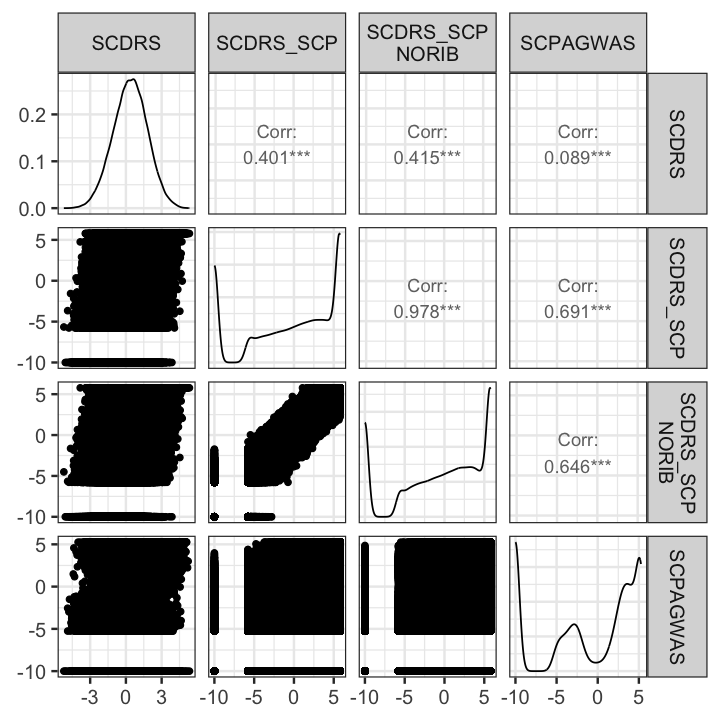

In [224]:
options(repr.plot.width=6, repr.plot.height=6)
colnames(corr_graph) <- c("SCDRS", "SCDRS_SCP", "SCDRS_SCP\nNORIB", "SCPAGWAS")
ggpairs(corr_graph, 
        upper = list(continuous = wrap(ggally_cor, method = "spearman"))) + 
theme_bw(base_size=15)
ggsave("RA_corr_plot_cell_zscores.png", dpi=300, width=6, height=6)

SCDRS     SCDRS_SCP SCDRS_SCP_NORIB SCPAGWAS
8318 0.2360691 5.776802  5.776802        3.399439
8452 0.2944319 5.776802  5.776802        2.977685

[1] 43085     4

SCDRS      SCDRS_SCP SCDRS_SCP_NORIB SCPAGWAS  
SCDRS           1.00000000 0.4044199 0.4214698       0.06552947
SCDRS_SCP       0.40441985 1.0000000 0.9732636       0.66044997
SCDRS_SCP_NORIB 0.42146982 0.9732636 1.0000000       0.60658423
SCPAGWAS        0.06552947 0.6604500 0.6065842       1.00000000

SCDRS      SCDRS_SCP  SCDRS_SCP_NORIB SCPAGWAS  
SCDRS            1.0000000  0.5932231  0.6018242      -0.4290029
SCDRS_SCP        0.5932231  1.0000000  0.9588121      -0.4702819
SCDRS_SCP_NORIB  0.6018242  0.9588121  1.0000000      -0.4842633
SCPAGWAS        -0.4290029 -0.4702819 -0.4842633       1.0000000

SCDRS      SCDRS_SCP  SCDRS_SCP_NORIB SCPAGWAS  
SCDRS            1.0000000  0.5950142  0.5991280      -0.4377428
SCDRS_SCP        0.5950142  1.0000000  0.9479059      -0.5113329
SCDRS_SCP_NORIB  0.5991280  0.9479059  1.0000000      -0.5100362
SCPAGWAS        -0.4377428 -0.5113329 -0.5100362       1.0000000

[1] 12158

[1] 11934

[1] 18993

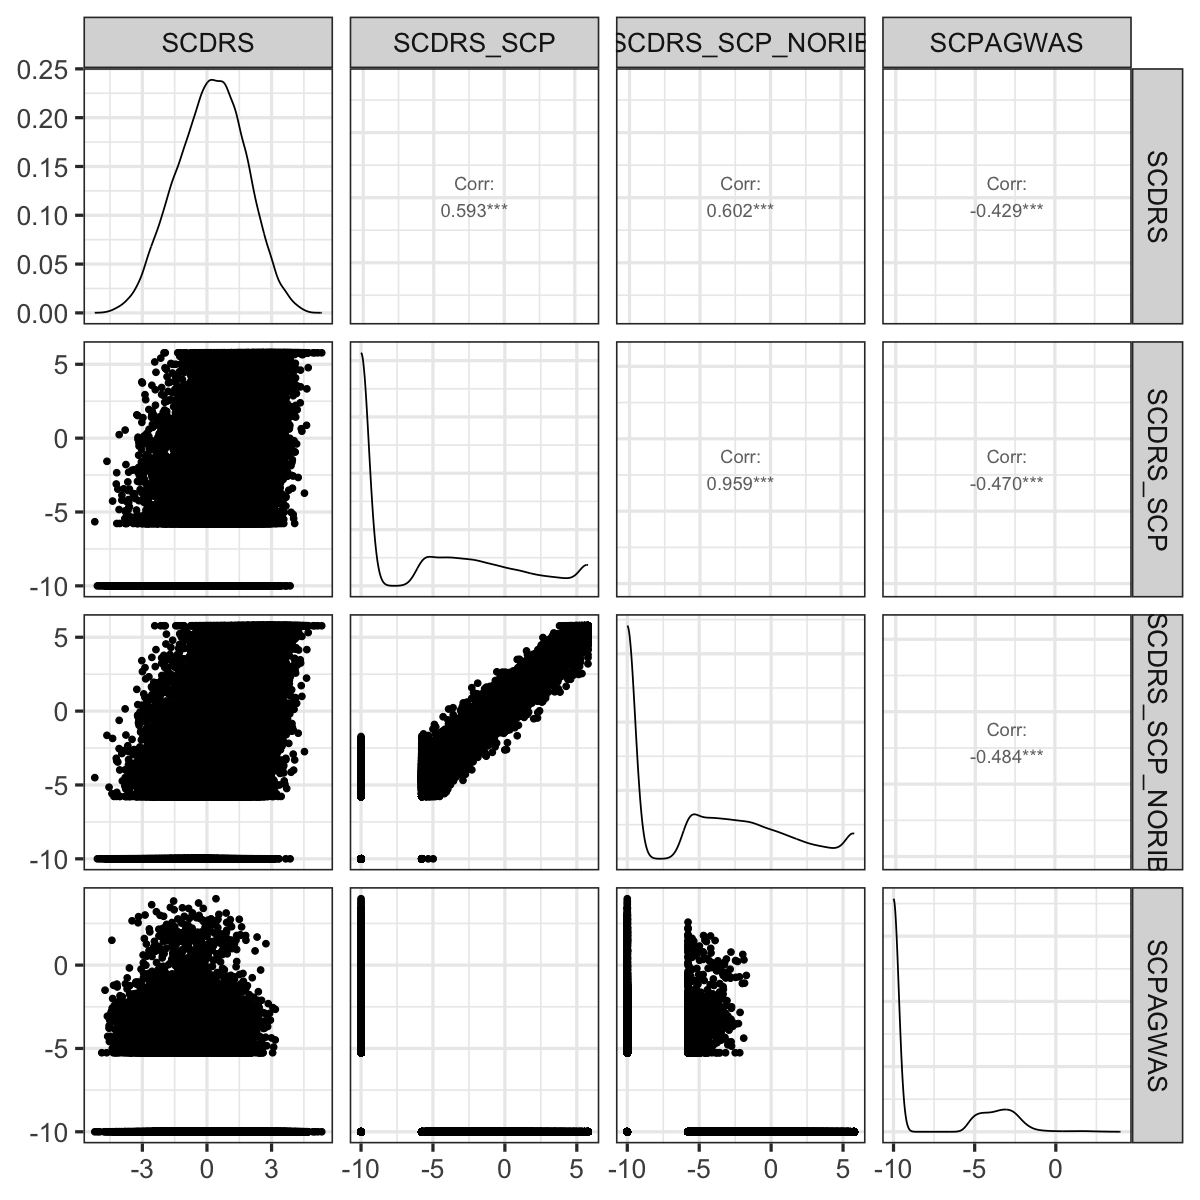

In [20]:
# Try again but remove or only include the cells with -10
corr_graph[1:2,]
corr_graph_10 = corr_graph[corr_graph$SCDRS_SCP == -10 | corr_graph$SCPAGWAS == -10,]
dim(corr_graph_10)
cor(corr_graph)
cor(corr_graph_10)
cor(corr_graph_10, method = "spearman")
options(repr.plot.height=10, repr.plot.width=10)
ggpairs(corr_graph_10) + theme_bw(base_size=20)

# are the same cells being -10
scdrs_scp_10 = rownames(corr_graph[corr_graph$SCDRS_SCP == -10,])
scgpwas_scp_10 = rownames(corr_graph[corr_graph$SCPAGWAS == -10,])
length(intersect(scdrs_scp_10, scgpwas_scp_10))
length(setdiff(scdrs_scp_10, scgpwas_scp_10))
length(setdiff(scgpwas_scp_10, scdrs_scp_10))

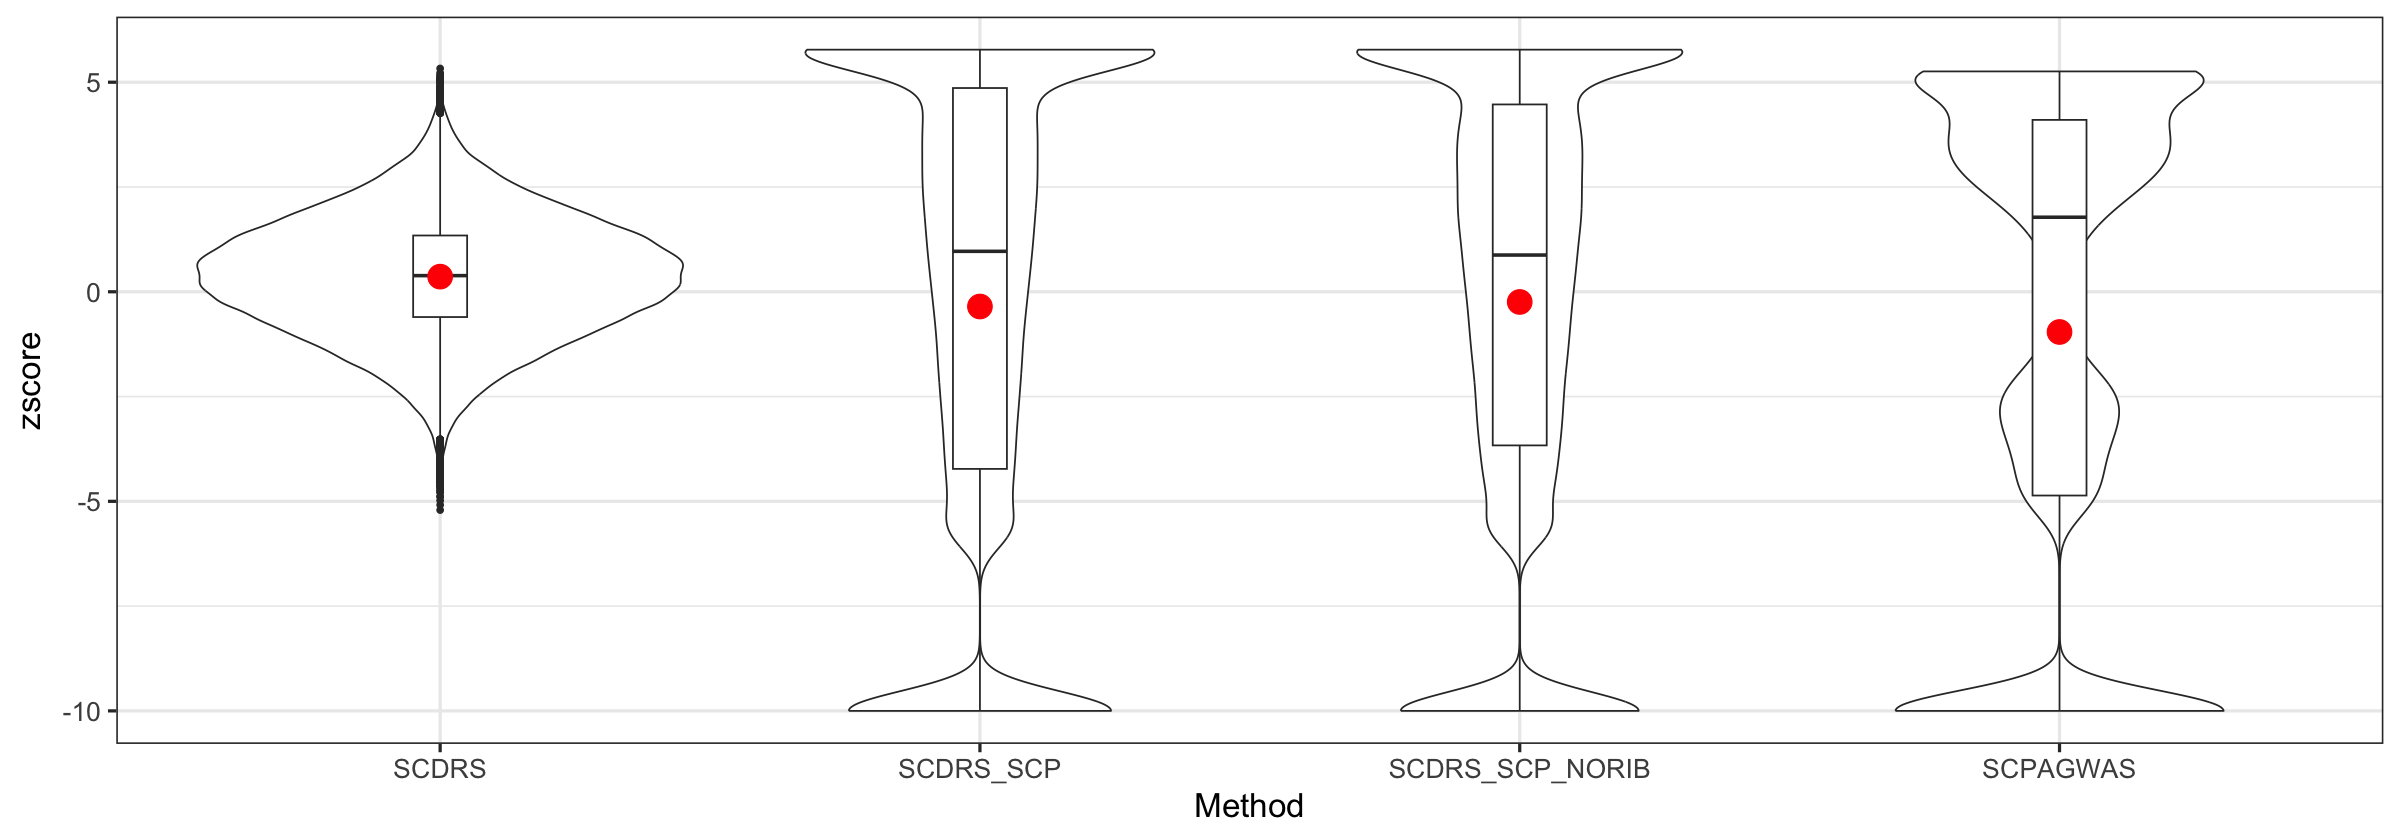

In [21]:
# plot the distributions of zscores
options(repr.plot.width=20, repr.plot.height=7)
corr_graph %>%
   pivot_longer(everything(), values_to="zscore", names_to="Method") %>%
   ggplot(aes(x=Method, y=zscore)) + geom_violin() + geom_boxplot(width=0.1) + theme_bw(base_size=20) + 
   stat_summary(fun=mean, geom="point", shape=20, size=10, color="red")

## Compare which cell types seem to have -10 extreme values in scDRS vs SCPagwas

In [22]:
colnames(meta_data)
quantile(meta_data$zscore_scp)

[1] "sample"                     "cell"                      
 [3] "cluster_number"             "cluster_name"              
 [5] "cell_type"                  "subject_id"                
 [7] "bt_score"                   "Z_score_micro"             
 [9] "Z_score_macro"              "Z_score_micro_scp"         
[11] "Z_score_micro_scpabs"       "Z_score_micro_scp_norib"   
[13] "Z_score_micro_scpabs_norib" "mc_pval"                   
[15] "zscore"                     "mc_pval_scp"               
[17] "zscore_scp"                 "mc_pval_scp_norib"         
[19] "zscore_scp_norib"           "scPagwas.TRS.Score"        
[21] "Random_Correct_BG_adjp"     "Random_Correct_BG_z"

0%         25%         50%         75%        100% 
-10.0000000  -4.2264710   0.9651926   4.8615255   5.7768025

In [23]:
scdrs_10 <- data.frame(table(meta_data[meta_data$zscore_scp == -10,]$cluster_name))
scdrs_norib_10 <- data.frame(table(meta_data[meta_data$zscore_scp_norib == -10,]$cluster_name))
scpagwas_10 <- data.frame(table(meta_data[meta_data$Random_Correct_BG_z == -10,]$cluster_name))

# all clusters considered
clusters_cons <- union(union(scdrs_10$Var1, scdrs_norib_10$Var1), scpagwas_10$Var1)
length(clusters_cons)
# get to have the same clusters
scdrs_only = setdiff(clusters_cons,  scpagwas_10$Var1)
add_10 = as.data.table(list("Var1"=scdrs_only, "Freq"=rep(0, length(scdrs_only))))
scpagwas_10 = rbind(scpagwas_10, add_10)

scpagwas_only = setdiff(clusters_cons,  scdrs_10$Var1)
add_10 = as.data.table(list("Var1"=scpagwas_only, "Freq"=rep(0, length(scpagwas_only))))
scdrs_10 = rbind(scdrs_10, add_10)

scpagwas__scdrs = setdiff(clusters_cons, scdrs_norib_10$Var1)
add_10 = as.data.table(list("Var1"=scpagwas__scdrs, "Freq"=rep(0, length(scpagwas__scdrs))))
scdrs_norib_10 = rbind(scdrs_norib_10, add_10)

# need to divide by total
sub <- meta_data[meta_data$cluster_name %in% scdrs_10$Var1,]
num <- data.frame(table(sub$cluster_name))
num[1:2,]
dim(num)
dim(scdrs_10)
dim(scdrs_norib_10)
dim(scpagwas_10)

scdrs_10[scdrs_10$Var1 == "Best4+ Enterocytes",]$Freq

# for each cell type get the info
celltype_list = c(); method_list = c(); proportion_list = c()
for (celltype in unique(scdrs_10$Var1)) {
    celltype_list = c(celltype_list, celltype, celltype, celltype)
    method_list = c(method_list, "SCDRS_SCP", "SCDRS_SCP_NORIB", "SCPAGWAS")
    prop_scdrs = scdrs_10[scdrs_10$Var1 == celltype,]$Freq/num[num$Var1 == celltype,]$Freq
    prop_scdrs_norib = scdrs_norib_10[scdrs_norib_10$Var1 == celltype,]$Freq/num[num$Var1 == celltype,]$Freq
    prop_scpgwas = scpagwas_10[scpagwas_10$Var1 == celltype,]$Freq/num[num$Var1 == celltype,]$Freq
    cat("\n", celltype, prop_scdrs, prop_scdrs_norib, prop_scpgwas)
    proportion_list = c(proportion_list, prop_scdrs, prop_scdrs_norib, prop_scpgwas)
    
    }
celltype_list[1:2]
plot_df <- as.data.table(list("Celltype"=celltype_list, "Method"=method_list, "Proportion"=proportion_list))
plot_df[1:2,]

[1] 64

Var1                                     Freq
1 B-0: CD24+CD27+CD11b+\n switched memory  3346
2 B-1: CD24++CD27+IgM+\n unswitched memory 1752

[1] 64  2

[1] 64  2

[1] 64  2

[1] 64  2

integer(0)


 B-0: CD24+CD27+CD11b+
 switched memory 0.01404662 0.03317394 0.0008965929
 B-1: CD24++CD27+IgM+
 unswitched memory 0.01141553 0.03424658 0
 B-2: IgM+IgD+TCL1A+ naive 0.009099467 0.01976781 0
 B-3: IgM+IgD+CD1c+ MZ-like 0.002001334 0.01267512 0
 B-4: AICDA+BCL6+ GC-like 0.01694915 0.01694915 0
 B-5: CD11c+LAMP1+ ABC 0.008571429 0.01142857 0
 B-6: IgM+ plasma 0.3344398 0.2315353 0.03485477
 B-7: HLA-DR+IgG+ plasmablast 0.1186299 0.06015038 0.02005013
 B-8: IgG1+IgG3+ plasma 0.2420518 0.1482768 0.03205985
 F-2: CD34+ sublining 0.3249962 0.2947675 0.2751266
 F-7: NOTCH3+ sublining 0.2819635 0.2732116 0.1122527
 M-0: MERTK+ SELENOP+ LYVE1+ 0.2909475 0.2046442 0.8580653
 M-1: MERTK+ SELENOP+ LYVE1- 0.2405084 0.1965995 0.7175636
 M-10: DC2 0.1944381 0.2125948 0.1358308
 M-11: CD16+/DC4 0.2379714 0.189857 0.02860858
 M-12: DC1 0.08966376 0.09090909 0.1606476
 M-13: pDC 0.06120219 0.0568306 0.001092896
 M-14: LAMP3+ 0.1270208 0.1501155 0.03926097
 M-2: MERTK+ S100A8+ 0.3824373 0.2743447 0.948

[1] "B-0: CD24+CD27+CD11b+\n switched memory"
[2] "B-0: CD24+CD27+CD11b+\n switched memory"

Celltype                                Method          Proportion
1 B-0: CD24+CD27+CD11b+\n switched memory SCDRS_SCP       0.01404662
2 B-0: CD24+CD27+CD11b+\n switched memory SCDRS_SCP_NORIB 0.03317394

In [24]:
cat("\nNumber total of cells with -10\t\t", "SCDRS_SCP:", sum(scdrs_10$Freq), "\tSCDRS_SCP_NORIB:", sum(scdrs_norib_10$Freq), "\tSCGPAGWAS:", sum(scpagwas_10$Freq))


Number total of cells with -10		 SCDRS_SCP: 24092 	SCDRS_SCP_NORIB: 20808 	SCGPAGWAS: 31151

In [246]:
dim(meta_data)
31151/137284
24092/137284
20808/137284

[1] 137284     22

[1] 0.2269092

[1] 0.1754902

[1] 0.151569

In [226]:
high_cts <- plot_df[plot_df$Proportion > 0.05,]$Celltype
length(unique(plot_df$Celltype))
length(unique(high_cts))

[1] 64

[1] 20

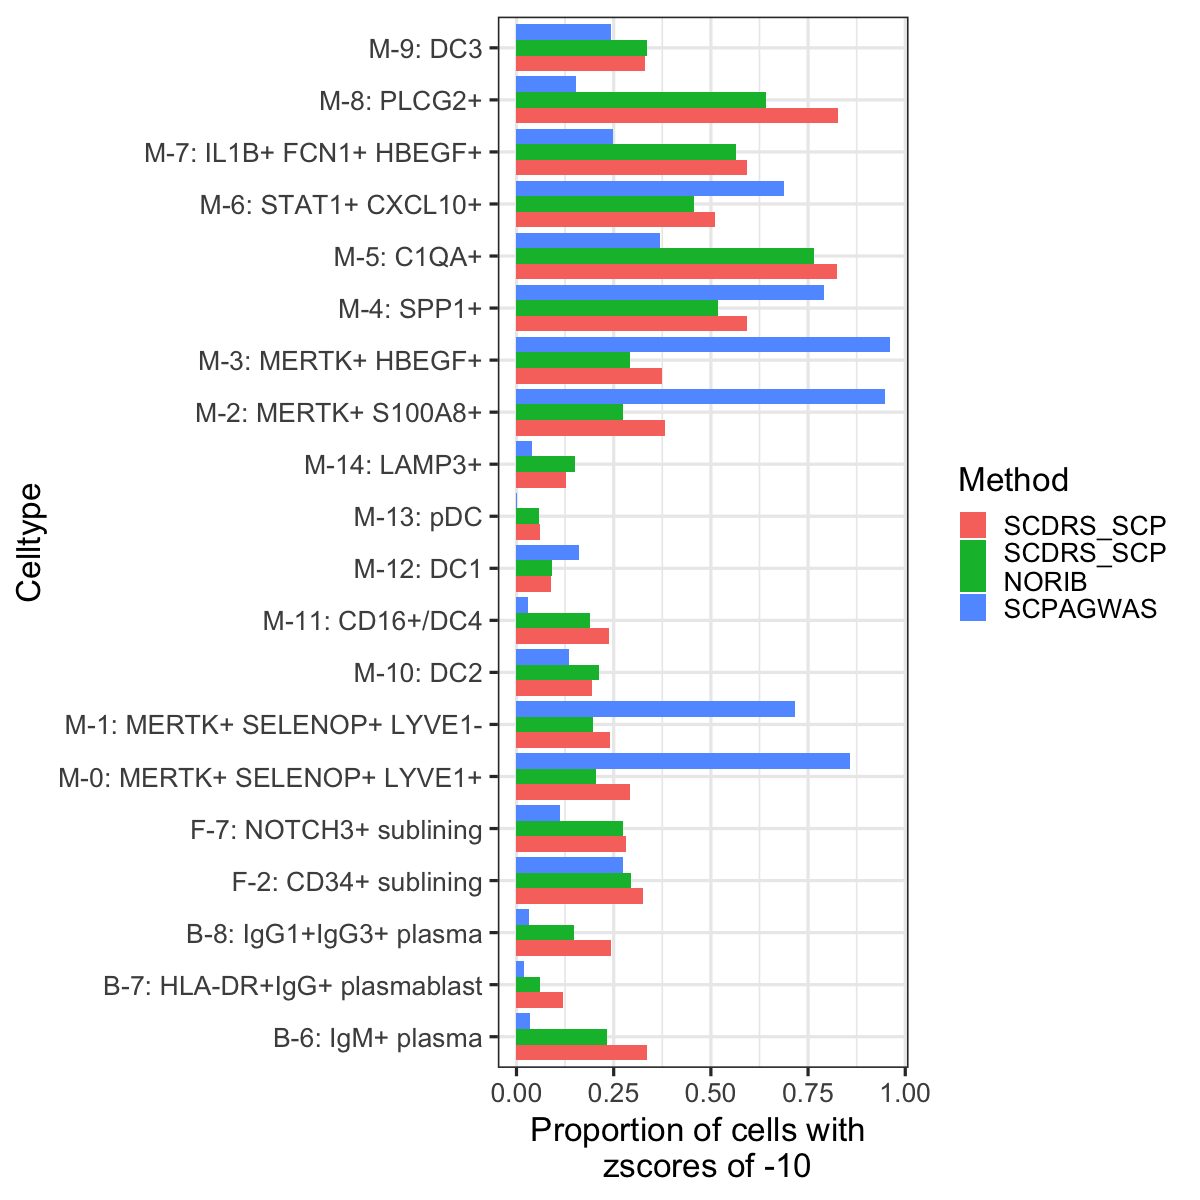

In [232]:
options(repr.plot.height=10, repr.plot.width=10)
plot_df[plot_df$Method == "SCDRS_SCP_NORIB",]$Method <- "SCDRS_SCP\nNORIB"
ggplot(plot_df[plot_df$Celltype %in% high_cts,]) + geom_bar(aes(x=Celltype, y=Proportion, fill=Method), 
                                                            stat="identity", position="dodge") + 
theme_bw(base_size=20) + coord_flip() + labs(y="Proportion of cells with \n zscores of -10")
ggsave("RA_extreme_zscore_celltypeprops.png", dpi=300, width=10, height=10)

### See if these cell types coordinate with the ones with high ribosomal counts (gene analysis)

In [26]:
# Get the RP genes from SCPAGWAS to consider
ra_scpagwas_genes <- fread("/Users/hopekirby/Downloads/scpgwas/RA_output_micro_subset/micro_white_subset_10.21.24_gene_PCC.csv")
ra_scpagwas_genes[1:2,]
# get the rank
ra_scpagwas_genes$RANK <- 0
ra_scpagwas_genes[order(-ra_scpagwas_genes$PCC),]$RANK = seq(0, nrow(ra_scpagwas_genes)-1)
ra_scpagwas_genes[1:4,]
ra_scpagwas_genes <- ra_scpagwas_genes[ra_scpagwas_genes$RANK < 1000,]
dim(ra_scpagwas_genes)
RP_genes <- ra_scpagwas_genes$V1[grepl("^RP", ra_scpagwas_genes$V1)]
RP_genes[1:4]
length(RP_genes)

V1          PCC
1 MIR1302-2HG 0  
2 FAM138A     0

V1          PCC       RANK 
1 MIR1302-2HG 0.0000000 22267
2 FAM138A     0.0000000 22268
3 OR4F5       0.0000000 22269
4 AL627309.1  0.0172011 11624

[1] 1000    3

[1] "RPL22" "RPL11" "RPA2"  "RPS8"

[1] 76

In [27]:
# read in the normalized count data
norm <- readRDS("/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/amp2/qc_lognorm_white_amp2RA_04_24_23.rds")
norm[1:2,1:3]
dim(norm)
# only keep cells in meta_data
norm <- norm[,meta_data$cell]
# only keep RP genes used in SCPAGWAS
norm <- norm[RP_genes,]
dim(norm)
norm[1:2,1:3]

                                                              
# plot the RP gene expression across the different cells overall and within cell states: -10 z score vs + 10 zscore
exp_plot <- data.table("cell"=colnames(norm), "RP_exp"=colSums(norm), "scdrs_zscore"=meta_data$zscore_scp, "scpagwas_zscore"=meta_data$Random_Correct_BG_z)
# plot a scatter plot with z score and RP expression 
exp_plot[1:3,]

2 x 3 sparse Matrix of class "dgCMatrix"
            BRI-401_AAGACTCCATTATGCG BRI-401_ACACAGTGTAACACGG
MIR1302-2HG                        .                        .
FAM138A                            .                        .
            BRI-401_ACTACGATCTGCGGAC
MIR1302-2HG                        .
FAM138A                            .

[1]  33538 183742

[1]     76 137284

2 x 3 sparse Matrix of class "dgCMatrix"
      BRI-401_AAGACTCCATTATGCG BRI-401_ACACAGTGTAACACGG
RPL22                 2.854421                 3.020092
RPL11                 4.294233                 4.085632
      BRI-401_ACTACGATCTGCGGAC
RPL22                 2.559796
RPL11                 .       

cell                     RP_exp   scdrs_zscore scpagwas_zscore
1 BRI-401_AAGACTCCATTATGCG 267.4873  5.77680250  3.399439       
2 BRI-401_ACACAGTGTAACACGG 263.0903  5.77680250  2.977685       
3 BRI-401_ACTACGATCTGCGGAC 149.7654 -0.05356842  1.218057

In [28]:
cor(exp_plot$RP_exp, exp_plot$scdrs_zscore)
cor(exp_plot$RP_exp, exp_plot$scpagwas_zscore)

[1] 0.5433175

[1] 0.6972598

used     (Mb)  gc trigger (Mb)   limit (Mb) max used   (Mb)  
Ncells  2720387 145.3    5187928  277.1    NA         5187928  277.1
Vcells 14704665 112.2 1235240937 9424.2 16384      1301313272 9928.3

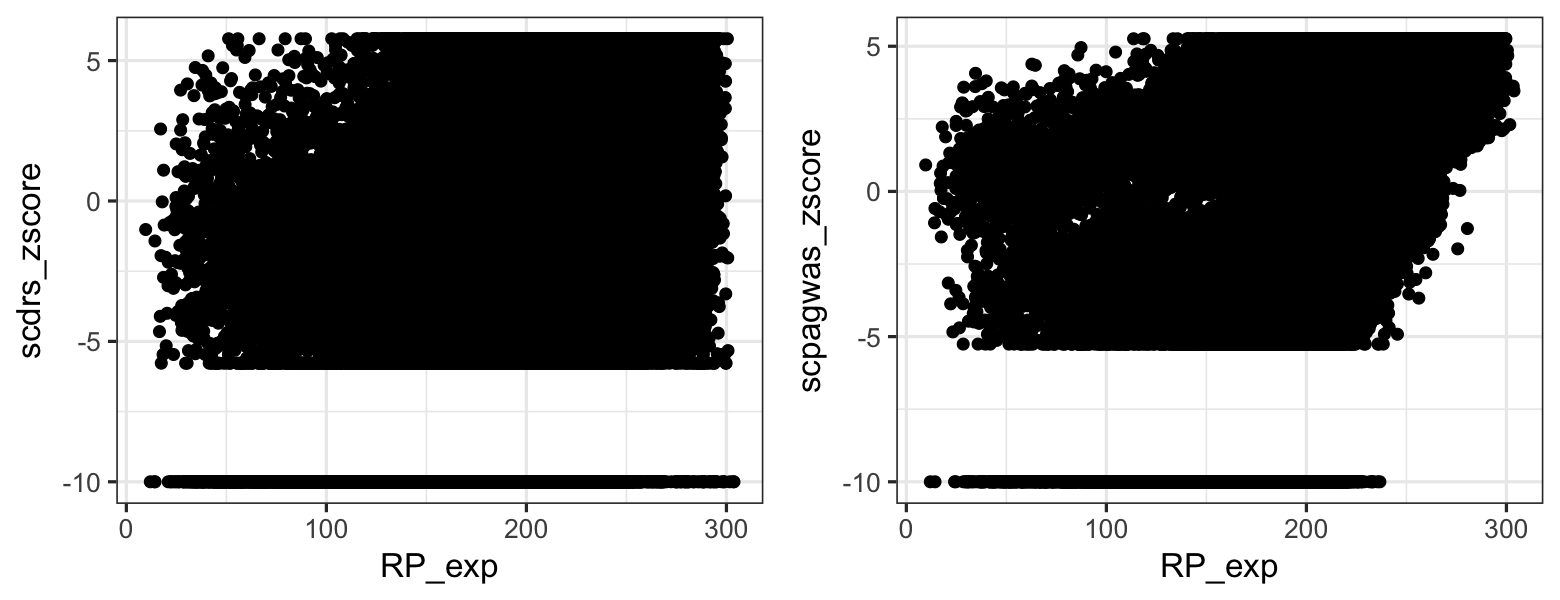

In [29]:
rm(norm)
gc()
p1 <- ggplot(exp_plot, aes(x=RP_exp, y=scdrs_zscore)) + geom_point(size=3) + theme_bw(base_size=20)
p2 <- ggplot(exp_plot, aes(x=RP_exp, y=scpagwas_zscore)) + geom_point(size=3) + theme_bw(base_size=20)
options(repr.plot.height=5, repr.plot.width=13)
plot_grid(p1, p2, nrow=1)

In [31]:
exp_plot$neg_10_scdrs <- FALSE
exp_plot$neg_10_scpagwas <- FALSE
exp_plot[exp_plot$cell %in% meta_data[meta_data$zscore_scp == -10,]$cell,]$neg_10_scdrs <- TRUE
exp_plot[exp_plot$cell %in% meta_data[meta_data$Random_Correct_BG_z == -10,]$cell,]$neg_10_scpagwas <- TRUE
table(exp_plot$neg_10_scdrs)
table(exp_plot$neg_10_scpagwas)


 FALSE   TRUE 
113192  24092 


 FALSE   TRUE 
106133  31151 

In [32]:
exp_plot[1:2,]

cell                     RP_exp   scdrs_zscore scpagwas_zscore neg_10_scdrs
1 BRI-401_AAGACTCCATTATGCG 267.4873 5.776802     3.399439        FALSE       
2 BRI-401_ACACAGTGTAACACGG 263.0903 5.776802     2.977685        FALSE       
  neg_10_scpagwas
1 FALSE          
2 FALSE

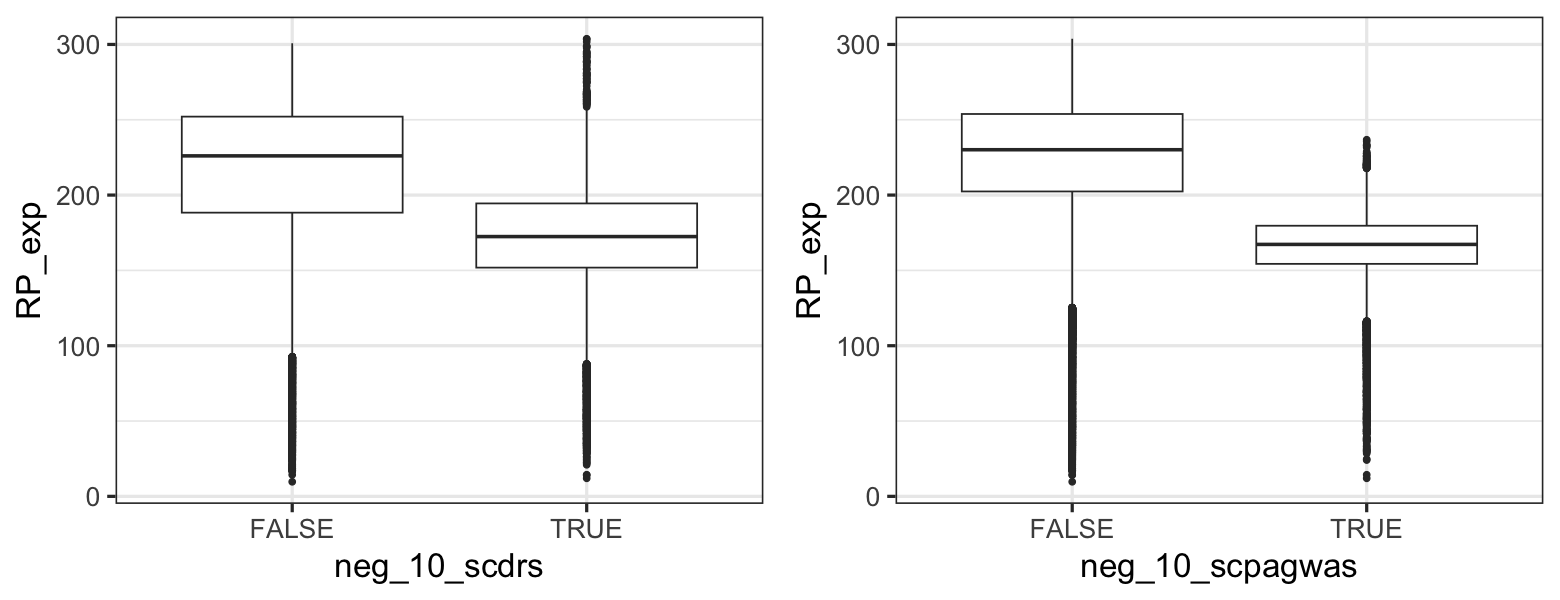

In [34]:
p1 <- ggplot(exp_plot, aes(x=neg_10_scdrs, y=RP_exp)) + geom_boxplot() + theme_bw(base_size=20)
p2 <- ggplot(exp_plot, aes(x=neg_10_scpagwas, y=RP_exp)) + geom_boxplot() + theme_bw(base_size=20)
plot_grid(p1, p2, nrow=1)

In [35]:
t.test(exp_plot[exp_plot$neg_10_scdrs == TRUE,]$RP_exp, exp_plot[exp_plot$neg_10_scdrs == FALSE,]$RP_exp)
t.test(exp_plot[exp_plot$neg_10_scpagwas == TRUE,]$RP_exp, exp_plot[exp_plot$neg_10_scpagwas == FALSE,]$RP_exp)


	Welch Two Sample t-test

data:  exp_plot[exp_plot$neg_10_scdrs == TRUE, ]$RP_exp and exp_plot[exp_plot$neg_10_scdrs == FALSE, ]$RP_exp
t = -178.38, df = 42440, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -47.52262 -46.48961
sample estimates:
mean of x mean of y 
 170.8393  217.8455 



	Welch Two Sample t-test

data:  exp_plot[exp_plot$neg_10_scpagwas == TRUE, ]$RP_exp and exp_plot[exp_plot$neg_10_scpagwas == FALSE, ]$RP_exp
t = -308.71, df = 105692, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -57.29346 -56.57055
sample estimates:
mean of x mean of y 
 165.5827  222.5147 


# Plot the final zscores and significance calls

## Read in and clean SCGWAS data

In [27]:
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/RA/10kb/"
scgwas_macro <- fread(paste0(scgwas_dir, "RA_celltypes.sig_module.txt"))
scgwas_micro <- fread(paste0(scgwas_dir, "RA_clusters.sig_module.txt"))

In [28]:
scgwas_macro_count <- data.frame(table(scgwas_macro$cell_type))
scgwas_macro_count <- scgwas_macro_count[order(-scgwas_macro_count$Freq),]
freq_dict = list()
rank = 1
# create a dictionary based on the numbers provided:
for (freq in unique(scgwas_macro_count$Freq)) {
    freq_dict[freq] = rank
    rank = rank + 1
    }
rank_freq_list = c()
# then change the rank_freq
for (freq in scgwas_macro_count$Freq) {
    rank_freq_list <- c(rank_freq_list, freq_dict[freq])
    }
scgwas_macro_count$rank_freq <- rank_freq_list

scgwas_macro_count$rank_freq <- as.character(scgwas_macro_count$rank_freq)
unique(scgwas_macro_count$rank_freq)



scgwas_micro_count <- data.frame(table(scgwas_micro$cell_type))
scgwas_micro_count <- scgwas_micro_count[order(-scgwas_micro_count$Freq),]
freq_dict = list()
rank = 1
# create a dictionary based on the numbers provided:
for (freq in unique(scgwas_micro_count$Freq)) {
    freq_dict[freq] = rank
    rank = rank + 1
    }
rank_freq_list = c()
# then change the rank_freq
for (freq in scgwas_micro_count$Freq) {
    rank_freq_list <- c(rank_freq_list, freq_dict[freq])
    }
scgwas_micro_count$rank_freq <- rank_freq_list

scgwas_micro_count$rank_freq <- as.character(scgwas_micro_count$rank_freq)
unique(scgwas_micro_count$rank_freq)


[1] "1" "2"

[1] "1" "2" "3" "4" "5"

In [29]:
# add the groups that have 0 counts to the thing
scgwas_0_list <- c(setdiff(names(meta_colors), scgwas_macro_count$Var1))
Var1 <- as.vector(scgwas_macro_count$Var1)
new_Var1 <- c(Var1, scgwas_0_list)
new_Freq <- c(scgwas_macro_count$Freq, rep(0, length(scgwas_0_list)))
new_rank_freq <- c(scgwas_macro_count$rank_freq, rep(" ", length(scgwas_0_list)))
scgwas_macro_count <- data.frame(group = new_Var1, 
                            Freq = new_Freq, 
                            rank_freq = new_rank_freq)
scgwas_macro_count[1:2,]

# add the groups that have 0 counts to the thing
scgwas_0_list <- c(setdiff(names(meta_colors), scgwas_micro_count$Var1))
Var1 <- as.vector(scgwas_micro_count$Var1)
new_Var1 <- c(Var1, scgwas_0_list)
new_Freq <- c(scgwas_micro_count$Freq, rep(0, length(scgwas_0_list)))
new_rank_freq <- c(scgwas_micro_count$rank_freq, rep(" ", length(scgwas_0_list)))
scgwas_micro_count <- data.frame(group = new_Var1, 
                            Freq = new_Freq, 
                            rank_freq = new_rank_freq)
scgwas_micro_count[1:2,]

group  Freq rank_freq
1 NK     2    1        
2 B cell 1    2

group                              Freq rank_freq
1 NK-4: CD56bright CD16- GZMA+CD160+ 6    1        
2 NK-9: MT-high                      6    1

In [48]:
scgwas_micro[1:2,]

module_genes                seed    edges                   module_score
1 ACTR2:CORO1A:DDX6:REL:SFPQ  TMEM243 104437:104453:8245:8377 10.35609    
2 ACTR2:CORO1A:DDX6:REL:SRRM2 MAVS    104437:8245:104475:8398 10.32359    
  m_gwas   m_scrnaseq module_score_z z_gwas   z_scrnaseq
1 7.881833 4.714150   2.926205       2.273809 1.857144  
2 7.624393 4.739278   2.900136       2.099648 1.889936  
  cell_type                             trait panel p           p_gwas    
1 B-0: CD24+CD27+CD11b+ switched memory RA    RA    0.000924428 0.02796395
2 B-0: CD24+CD27+CD11b+ switched memory RA    RA    0.001155535 0.03697712
  p_scrn    
1 0.03559048
2 0.03119945

## Large scale cell states

In [221]:
ranked_cell_types <- c("Fibroblast", "B cell", "Myeloid", "NK", "T cell")

scdrs_sig_cell_types <- macro_table[macro_table$assoc_mcp < 0.05,]$group
length(scdrs_sig_cell_types)
scdrs_sig_cell_types

# scpgwas_sig_cell_types <- scp_type_scores_macro[scp_type_scores_macro$pvalue < 0.05,]$celltype
# length(scpgwas_sig_cell_types)

scgwas_sig_cell_types <- scgwas_macro_count[scgwas_macro_count$Freq > 0,]$group
length(scgwas_sig_cell_types)
scgwas_sig_cell_types

length(intersect(scpgwas_sig_cell_types, scdrs_sig_cell_types))
setdiff(scdrs_sig_cell_types, scpgwas_sig_cell_types)
setdiff(scpgwas_sig_cell_types, scdrs_sig_cell_types)


[1] 3

[1] "Myeloid" "NK"      "T cell"

[1] 2

[1] "NK"     "B cell"

ERROR: Error: object 'scpgwas_sig_cell_types' not found


In [52]:
scgwas_macro[,c("cell_type", "module_score_z")]

cell_type module_score_z
1 B cell    2.936995      
2 NK        3.799265      
3 NK        3.253252

In [54]:
colnames(meta_data)

[1] "sample"                     "cell"                      
 [3] "cluster_number"             "cluster_name"              
 [5] "cell_type"                  "subject_id"                
 [7] "bt_score"                   "Z_score_micro"             
 [9] "Z_score_macro"              "Z_score_micro_scp"         
[11] "Z_score_micro_scpabs"       "Z_score_micro_scp_norib"   
[13] "Z_score_micro_scpabs_norib" "mc_pval"                   
[15] "zscore"                     "mc_pval_scp"               
[17] "zscore_scp"                 "mc_pval_scp_norib"         
[19] "zscore_scp_norib"           "scPagwas.TRS.Score"        
[21] "Random_Correct_BG_adjp"     "Random_Correct_BG_z"

In [55]:
# add cell type to scgwas_micro
scgwas_macro_graph <- scgwas_macro[,c("cell_type", "module_score_z")]
scgwas_macro_graph[1:2,]
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(ranked_cell_types, scgwas_macro$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(ranked_cell_types, scgwas_macro$cell_type)))))
scgwas_macro_graph <- rbind(scgwas_macro_graph, add_df)              

# add z_score
Z_scores <- c()
for (cell_type in scgwas_macro_graph$cell_type) {
    Z_scores <- c(Z_scores, meta_data[meta_data$cell_type == cell_type,]$Z_score_macro[1])
    }
scgwas_macro_graph$Z_score <- Z_scores
scgwas_macro_graph[1:3,]

cell_type module_score_z
1 B cell    2.936995      
2 NK        3.799265

cell_type module_score_z Z_score 
1 B cell    2.936995       1.537467
2 NK        3.799265       2.389914
3 NK        3.253252       2.389914

In [174]:
# figure out color breaks
colnames(meta_data)
min(meta_data$Z_score_micro)
max(meta_data$Z_score_micro)
min(meta_data$Z_score_micro_scp)
max(meta_data$Z_score_micro_scp)

min(meta_data$bt_score)
max(meta_data$bt_score)

test = meta_data[meta_data$Z_score_micro_scp > 60,]
test[1:2,]

test = meta_data[meta_data$Z_score_micro_scp < -14,]
test[1:2,]

breaks_use = c(-14.5, -8, -3, -1, 1, 3, 8, 65)
limits_use = c('(-14.5,-8]', '(-8,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,8]', '(8,65]')
color_values = c('blue', '#0571b0', '#92c5de','black', "#f4a582", '#ca0020', 'brown')

[1] "sample"                     "cell"                      
 [3] "cluster_number"             "cluster_name"              
 [5] "cell_type"                  "subject_id"                
 [7] "bt_score"                   "Z_score_micro"             
 [9] "Z_score_macro"              "Z_score_micro_scp"         
[11] "Z_score_micro_scpabs"       "Z_score_micro_scp_norib"   
[13] "Z_score_micro_scpabs_norib" "mc_pval"                   
[15] "zscore"                     "mc_pval_scp"               
[17] "zscore_scp"                 "mc_pval_scp_norib"         
[19] "zscore_scp_norib"           "scPagwas.TRS.Score"        
[21] "Random_Correct_BG_adjp"     "Random_Correct_BG_z"

[1] -2.857385

[1] 11.02748

[1] -14.04303

[1] 64.78217

[1] -4.79681

[1] 4.154651

sample  cell                     cluster_number cluster_name cell_type
117423 BRI-401 BRI-401_GTACAGTAGGTTGAGC T-20           T-20: CD38+  T cell   
120083 BRI-401 BRI-401_GTGTCCTGTGGACCTC T-20           T-20: CD38+  T cell   
       subject_id bt_score Z_score_micro Z_score_macro Z_score_micro_scp ⋯
117423 300-0302   4.154651 9.401219      9.260848      64.78217          ⋯
120083 300-0302   4.154651 9.401219      9.260848      64.78217          ⋯
       Z_score_micro_scpabs_norib mc_pval   zscore   mc_pval_scp zscore_scp
117423 NA                         0.1138861 1.219620 0.000999001 5.776802  
120083 NA                         0.1598402 1.043817 0.000999001 3.289001  
       mc_pval_scp_norib zscore_scp_norib scPagwas.TRS.Score
117423 0.000999001       5.776802         0.4124167         
120083 0.001998002       2.916345         0.2627089         
       Random_Correct_BG_adjp Random_Correct_BG_z
117423 2.356490e-06           4.953630           
120083 2.718955e-01           1.069298

sample  cell                     cluster_number cluster_name cell_type
81901 BRI-401 BRI-401_AAAGTGAAGGCTTAGG M-5            M-5: C1QA+   Myeloid  
83012 BRI-401 BRI-401_AACGTCAGTGAACTAA M-5            M-5: C1QA+   Myeloid  
      subject_id bt_score   Z_score_micro Z_score_macro Z_score_micro_scp ⋯
81901 300-0302   -0.9207471 -1.641443     4.285717      -14.04303         ⋯
83012 300-0302   -0.9207471 -1.641443     4.285717      -14.04303         ⋯
      Z_score_micro_scpabs_norib mc_pval   zscore     mc_pval_scp zscore_scp
81901 NA                         0.9530470 -1.7144089 1           -10       
83012 NA                         0.7712288 -0.7548236 1           -10       
      mc_pval_scp_norib zscore_scp_norib scPagwas.TRS.Score
81901 1                 -10              0.07432197        
83012 1                 -10              0.02721171        
      Random_Correct_BG_adjp Random_Correct_BG_z
81901 1                       -3.648019         
83012 1                      -10.000000

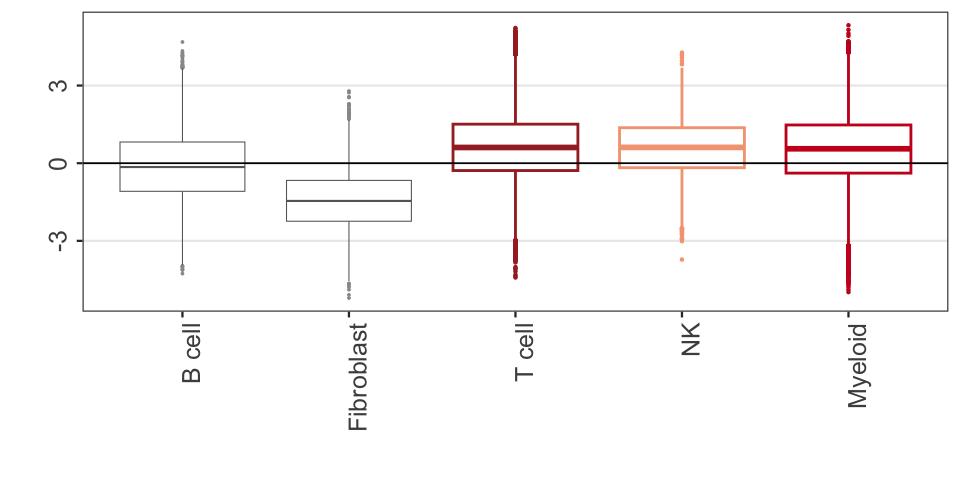

In [175]:
# SCDRS

data2 = meta_data[meta_data$cell_type %in% scdrs_sig_cell_types,]
data1 = meta_data[!meta_data$cell_type %in% scdrs_sig_cell_types,]

options(repr.plot.height = 4, repr.plot.width =8 ) #[meta_data$pval < 0.1,]

p1 <- ggplot(meta_data, aes(x=factor(cell_type, levels=c("B cell", "Fibroblast", "T cell", "NK", "Myeloid")), y=zscore, color=cut(Z_score_macro, breaks = breaks_use))) +
geom_boxplot(data=data1, color="grey40", aes(x=factor(cell_type, levels=rev(ranked_cell_types))), linewidth=0.3, outlier.colour = "grey60", outlier.size=0.4) +  
geom_boxplot(data=data2, linewidth=0.8, outlier.size=0.6, aes(x=factor(cell_type, levels=rev(ranked_cell_types))),) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
scale_color_manual(values = color_values,
                   limits = limits_use) +

theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_text(angle=90, size=15, hjust=1),legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 


p1


# ggsave("./scDRS_UC_Label_full_LIMITED.pdf", height=5, width=22.5)
# save_plot("./scDRS_UC_Label_full_LIMITED.svg", fig = p1, width=22.5, height=5)

In [60]:
scgwas_macro_graph

cell_type  module_score_z Z_score  
1 B cell     2.936995        1.537467
2 NK         3.799265        2.389914
3 NK         3.253252        2.389914
4 Fibroblast 0.000000       -3.161077
5 Myeloid    0.000000        4.285717
6 T cell     0.000000        9.260848

In [150]:
color_values
limits_use
ranked_cell_types
rev(ranked_cell_types)

[1] "#0571b0" "#92c5de" "black"   "#f4a582" "#ca0020" "brown"

[1] "(-14.5,-3]" "(-3,-1]"    "(-1,1]"     "(1,3]"      "(3,8]"     
[6] "(8,65]"

[1] "Fibroblast" "B cell"     "Myeloid"    "NK"         "T cell"

[1] "T cell"     "NK"         "Myeloid"    "B cell"     "Fibroblast"

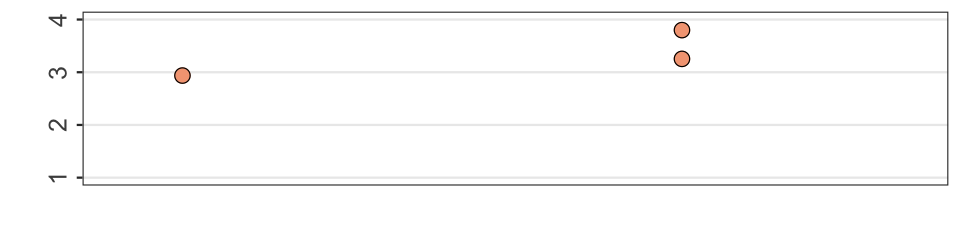

In [176]:
# SCGWAS

options(repr.plot.height = 2, repr.plot.width =8 )
p_scgwas <- ggplot(scgwas_macro_graph, aes(x=factor(cell_type, levels=c("B cell", "Fibroblast", "T cell", "NK", "Myeloid")), 
                                           y=module_score_z, color=cut(Z_score, breaks = breaks_use))) +
geom_point(size=4) +  geom_point(shape = 1,size = 4,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(legend.position="None", 
     axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_color_manual(values = color_values,
                   limits = limits_use) +
  ylim(1, 4) + labs(x="", y="") 

p_scgwas
# ggsave("./scGWAS_UC_TBE_Zscores_LIMITED.pdf", height=2, width=22.5)
# save_plot("./scGWAS_UC_Label_full_LIMITED.svg",  width=40, height=4,axis.textsize=0.5)

## Cell states/clusters

In [152]:
# list to add the ranked clusters within cell types for proper order
micro_table[micro_table$group == "B-0: CD24+CD27+CD11b+ switched memory",]$group <- "B-0: CD24+CD27+CD11b+\n switched memory"
micro_table[micro_table$group == "B-1: CD24++CD27+IgM+ unswitched memory",]$group <- "B-1: CD24++CD27+IgM+\n unswitched memory"
ranked_cell_clusters <- c()
for (cell_type in meta_colors1_clean) {
    # get the ranked cells in that group
    data <- micro_table[micro_table$group %in% names(cell_type),]
    data <- data[order(assoc_mcz),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

[1] "F-2: CD34+ sublining"                    
 [2] "F-7: NOTCH3+ sublining"                  
 [3] "B-8: IgG1+IgG3+ plasma"                  
 [4] "B-6: IgM+ plasma"                        
 [5] "B-7: HLA-DR+IgG+ plasmablast"            
 [6] "B-2: IgM+IgD+TCL1A+ naive"               
 [7] "B-1: CD24++CD27+IgM+\n unswitched memory"
 [8] "B-3: IgM+IgD+CD1c+ MZ-like"              
 [9] "B-0: CD24+CD27+CD11b+\n switched memory" 
[10] "B-4: AICDA+BCL6+ GC-like"                
[11] "B-5: CD11c+LAMP1+ ABC"                   
[12] "M-8: PLCG2+"                             
[13] "M-5: C1QA+"                              
[14] "M-7: IL1B+ FCN1+ HBEGF+"                 
[15] "M-13: pDC"                               
[16] "M-11: CD16+/DC4"                         
[17] "M-6: STAT1+ CXCL10+"                     
[18] "M-9: DC3"                                
[19] "M-4: SPP1+"                              
[20] "M-10: DC2"                               
[21] "M-2: MERTK+ S100A8+"                     
[22] "M-12: DC1"                               
[23] "M-14: LAMP3+"                            
[24] "M-0: MERTK+ SELENOP+ LYVE1+"             
[25] "M-3: MERTK+ HBEGF+"                      
[26] "M-1: MERTK+ SELENOP+ LYVE1-"             
[27] "NK-8: CD56bright CD16- IFN response"     
[28] "NK-9: MT-high"                           
[29] "NK-11: MKI67+ Proliferating"             
[30] "NK-3: CD56dim CD16+ GZMB-"               
[31] "NK-4: CD56bright CD16- GZMA+CD160+"      
[32] "NK-2: CD56dim CD16+ IFNG+CD160-"         
[33] "NK-6: CD56bright CD16- GNLY+"            
[34] "NK-12: IL7R+ ILC"                        
[35] "NK-0: CD56dim CD16+ IFNG-"               
[36] "NK-1: CD56dim CD16+ IFNG+CD160+"         
[37] "NK-5: CD56bright CD16- GZMA+CD69+"       
[38] "NK-7: CD56bright CD16- GNLY+CD69+"       
[39] "NK-10: PCNA+ Proliferating"              
[40] "NK-13: IL7R+CD161+ ILC"                  
[41] "T-19: MT-high (low quality)"             
[42] "T-22: Vdelta1"                           
[43] "T-12: CD4+ GNLY+"                        
[44] "T-23: Vdelta2"                           
[45] "T-15: CD8+ GZMB+/TEMRA"                  
[46] "T-14: CD8+ GZMK+ memory"                 
[47] "T-16: CD8+ CD45ROlow/naive"              
[48] "T-4: CD4+ naive"                         
[49] "T-5: CD4+ GZMK+ memory"                  
[50] "T-21: Innate-like"                       
[51] "T-17: CD8+ activated/NK-like"            
[52] "T-13: CD8+ GZMK/B+ memory"               
[53] "T-9: CD4+ CD25-low Treg"                 
[54] "T-0: CD4+ IL7R+ memory"                  
[55] "T-2: CD4+ IL7R+CCR5+ memory"             
[56] "T-1: CD4+ CD161+ memory"                 
[57] "T-3: CD4+ Tfh/Tph"                       
[58] "T-6: CD4+ memory"                        
[59] "T-18: Proliferating"                     
[60] "T-7: CD4+ Tph"                           
[61] "T-10: CD4+ OX40+NR3C1+"                  
[62] "T-11: CD4+ CD146+ memory"                
[63] "T-20: CD38+"                             
[64] "T-8: CD4+ CD25-high Treg"

In [153]:
unique(meta_data$cluster_name)

[1] B-1: CD24++CD27+IgM+\n unswitched memory
 [2] B-2: IgM+IgD+TCL1A+ naive               
 [3] B-0: CD24+CD27+CD11b+\n switched memory 
 [4] B-5: CD11c+LAMP1+ ABC                   
 [5] B-7: HLA-DR+IgG+ plasmablast            
 [6] B-3: IgM+IgD+CD1c+ MZ-like              
 [7] B-8: IgG1+IgG3+ plasma                  
 [8] B-6: IgM+ plasma                        
 [9] B-4: AICDA+BCL6+ GC-like                
[10] M-10: DC2                               
[11] M-4: SPP1+                              
[12] M-1: MERTK+ SELENOP+ LYVE1-             
[13] M-8: PLCG2+                             
[14] M-2: MERTK+ S100A8+                     
[15] M-6: STAT1+ CXCL10+                     
[16] M-0: MERTK+ SELENOP+ LYVE1+             
[17] M-5: C1QA+                              
[18] M-7: IL1B+ FCN1+ HBEGF+                 
[19] M-14: LAMP3+                            
[20] M-3: MERTK+ HBEGF+                      
[21] M-9: DC3                                
[22] M-12: DC1                               
[23] M-11: CD16+/DC4                         
[24] M-13: pDC                               
[25] F-7: NOTCH3+ sublining                  
[26] F-2: CD34+ sublining                    
[27] NK-5: CD56bright CD16- GZMA+CD69+       
[28] NK-1: CD56dim CD16+ IFNG+CD160+         
[29] NK-9: MT-high                           
[30] NK-12: IL7R+ ILC                        
[31] NK-11: MKI67+ Proliferating             
[32] NK-6: CD56bright CD16- GNLY+            
[33] NK-4: CD56bright CD16- GZMA+CD160+      
[34] NK-0: CD56dim CD16+ IFNG-               
[35] NK-7: CD56bright CD16- GNLY+CD69+       
[36] NK-2: CD56dim CD16+ IFNG+CD160-         
[37] NK-10: PCNA+ Proliferating              
[38] NK-13: IL7R+CD161+ ILC                  
[39] NK-3: CD56dim CD16+ GZMB-               
[40] NK-8: CD56bright CD16- IFN response     
[41] T-4: CD4+ naive                         
[42] T-6: CD4+ memory                        
[43] T-8: CD4+ CD25-high Treg                
[44] T-12: CD4+ GNLY+                        
[45] T-1: CD4+ CD161+ memory                 
[46] T-2: CD4+ IL7R+CCR5+ memory             
[47] T-0: CD4+ IL7R+ memory                  
[48] T-11: CD4+ CD146+ memory                
[49] T-14: CD8+ GZMK+ memory                 
[50] T-9: CD4+ CD25-low Treg                 
[51] T-5: CD4+ GZMK+ memory                  
[52] T-15: CD8+ GZMB+/TEMRA                  
[53] T-21: Innate-like                       
[54] T-13: CD8+ GZMK/B+ memory               
[55] T-10: CD4+ OX40+NR3C1+                  
[56] T-18: Proliferating                     
[57] T-16: CD8+ CD45ROlow/naive              
[58] T-7: CD4+ Tph                           
[59] T-22: Vdelta1                           
[60] T-3: CD4+ Tfh/Tph                       
[61] T-19: MT-high (low quality)             
[62] T-17: CD8+ activated/NK-like            
[63] T-23: Vdelta2                           
[64] T-20: CD38+                             
64 Levels: B-0: CD24+CD27+CD11b+\n switched memory ...

In [154]:
# add cell type to scgwas_micro
scgwas_micro_graph <- scgwas_micro[,c("cell_type", "module_score_z")]
scgwas_micro_graph[1:2,]
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(ranked_cell_clusters, scgwas_micro$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(ranked_cell_clusters, scgwas_micro$cell_type)))))
scgwas_micro_graph <- rbind(scgwas_micro_graph, add_df)              
scgwas_micro_graph[scgwas_micro_graph$cell_type == "B-0: CD24+CD27+CD11b+ switched memory",]$cell_type <- "B-0: CD24+CD27+CD11b+\n switched memory"
scgwas_micro_graph[scgwas_micro_graph$cell_type == "B-1: CD24++CD27+IgM+ unswitched memory",]$cell_type <- "B-1: CD24++CD27+IgM+\n unswitched memory"
# add z_score
Z_scores <- c()
for (cell_type in scgwas_micro_graph$cell_type) {
    Z_scores <- c(Z_scores, meta_data[meta_data$cluster_name == cell_type,]$Z_score_micro[1])
    }
length(Z_scores)
scgwas_micro_graph$Z_score <- Z_scores
scgwas_micro_graph[1:3,]

cell_type                             module_score_z
1 B-0: CD24+CD27+CD11b+ switched memory 2.926205      
2 B-0: CD24+CD27+CD11b+ switched memory 2.900136

[1] 95

cell_type                                module_score_z Z_score 
1 B-0: CD24+CD27+CD11b+\n switched memory  2.926205       2.609987
2 B-0: CD24+CD27+CD11b+\n switched memory  2.900136       2.609987
3 B-1: CD24++CD27+IgM+\n unswitched memory 3.091584       2.053155

In [155]:
scdrs_sig_cell_clusters <- micro_table[micro_table$assoc_mcp < 0.05,]$group
length(scdrs_sig_cell_clusters)
scdrs_sig_cell_clusters[scdrs_sig_cell_clusters== "B-0: CD24+CD27+CD11b+ switched memory"] <- "B-0: CD24+CD27+CD11b+\n switched memory"
scdrs_sig_cell_clusters[scdrs_sig_cell_clusters == "B-1: CD24++CD27+IgM+ unswitched memory"] <- "B-1: CD24++CD27+IgM+\n unswitched memory"

scdrs_scp_sig_cell_clusters <- micro_table_scp[micro_table_scp$assoc_mcp < 0.05,]$group
length(scdrs_scp_sig_cell_clusters)
scdrs_scp_sig_cell_clusters[scdrs_scp_sig_cell_clusters== "B-0: CD24+CD27+CD11b+ switched memory"] <- "B-0: CD24+CD27+CD11b+\n switched memory"
scdrs_scp_sig_cell_clusters[scdrs_scp_sig_cell_clusters == "B-1: CD24++CD27+IgM+ unswitched memory"] <- "B-1: CD24++CD27+IgM+\n unswitched memory"

scdrs_scp_norib_sig_cell_clusters <- micro_table_scp_norib[micro_table_scp_norib$assoc_mcp < 0.05,]$group
length(scdrs_scp_norib_sig_cell_clusters)
scdrs_scp_norib_sig_cell_clusters[scdrs_scp_norib_sig_cell_clusters== "B-0: CD24+CD27+CD11b+ switched memory"] <- "B-0: CD24+CD27+CD11b+\n switched memory"
scdrs_scp_norib_sig_cell_clusters[scdrs_scp_norib_sig_cell_clusters == "B-1: CD24++CD27+IgM+ unswitched memory"] <- "B-1: CD24++CD27+IgM+\n unswitched memory"


scpgwas_sig_cell_clusters <- scp_type_scores[scp_type_scores$pvalue < 0.05,]$celltype
length(scpgwas_sig_cell_clusters)
scpgwas_sig_cell_clusters[scpgwas_sig_cell_clusters== "B-0: CD24+CD27+CD11b+ switched memory"] <- "B-0: CD24+CD27+CD11b+\n switched memory"
scpgwas_sig_cell_clusters[scpgwas_sig_cell_clusters == "B-1: CD24++CD27+IgM+ unswitched memory"] <- "B-1: CD24++CD27+IgM+\n unswitched memory"

scgwas_sig_cell_clusters <- scgwas_micro_count[scgwas_micro_count$Freq > 0,]$group
length(scgwas_sig_cell_clusters)
scgwas_sig_cell_clusters[scgwas_sig_cell_clusters== "B-0: CD24+CD27+CD11b+ switched memory"] <- "B-0: CD24+CD27+CD11b+\n switched memory"
scgwas_sig_cell_clusters[scgwas_sig_cell_clusters == "B-1: CD24++CD27+IgM+ unswitched memory"] <- "B-1: CD24++CD27+IgM+\n unswitched memory"

length(intersect(scpgwas_sig_cell_clusters, scdrs_sig_cell_clusters))
setdiff(scdrs_sig_cell_clusters, scpgwas_sig_cell_clusters)
setdiff(scpgwas_sig_cell_clusters, scdrs_sig_cell_clusters)



[1] 47

[1] 72

[1] 72

[1] 44

[1] 26

[1] 37

[1] "M-0: MERTK+ SELENOP+ LYVE1+" "M-10: DC2"                  
 [3] "M-12: DC1"                   "M-14: LAMP3+"               
 [5] "M-1: MERTK+ SELENOP+ LYVE1-" "M-2: MERTK+ S100A8+"        
 [7] "M-3: MERTK+ HBEGF+"          "M-4: SPP1+"                 
 [9] "M-6: STAT1+ CXCL10+"         "M-9: DC3"

[1] "B-2: IgM+IgD+TCL1A+ naive"           "NK-11: MKI67+ Proliferating"        
[3] "NK-3: CD56dim CD16+ GZMB-"           "NK-4: CD56bright CD16- GZMA+CD160+" 
[5] "NK-6: CD56bright CD16- GNLY+"        "NK-8: CD56bright CD16- IFN response"
[7] "NK-9: MT-high"

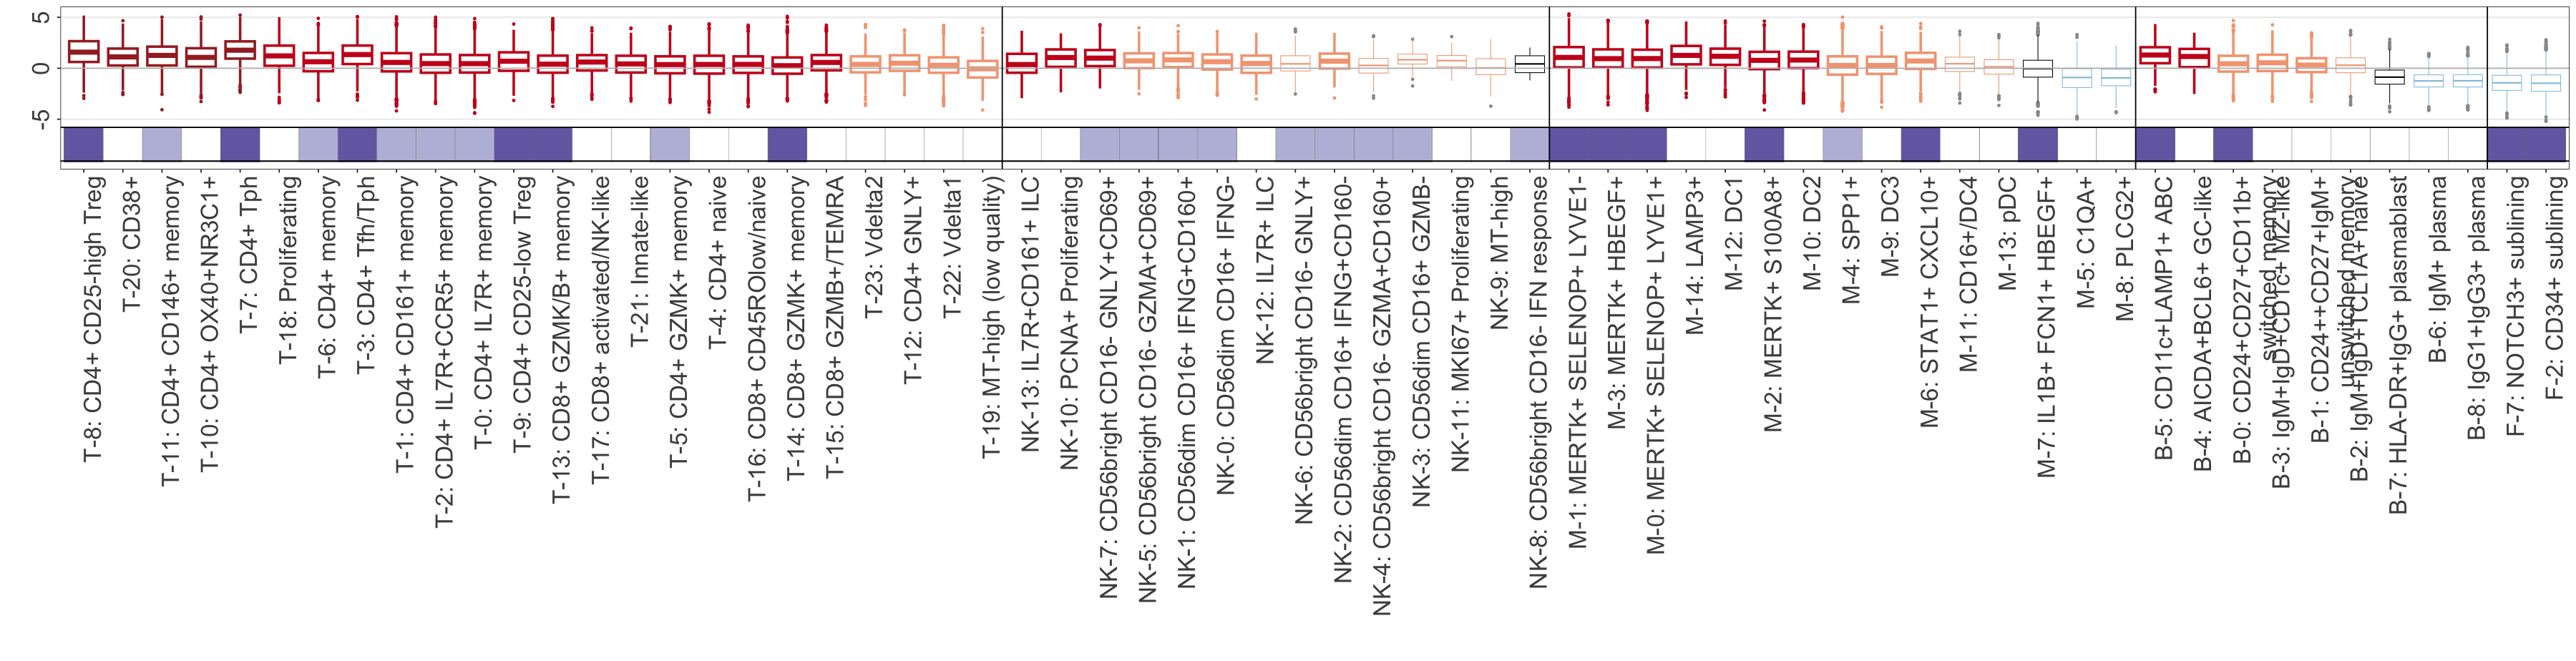

In [265]:
data2 = meta_data[meta_data$cluster_name %in% scdrs_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster_name %in% scdrs_sig_cell_clusters,]

options(repr.plot.height = 7.7, repr.plot.width =30 ) #[meta_data$pval < 0.1,]

p1 <- ggplot(meta_data, aes(x=factor(cluster_name, levels=rev(ranked_cell_clusters)), y=zscore, color=cut(Z_score_micro, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.7) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.7) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="grey") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +

new_scale("fill") +

geom_tile(aes(x=factor(cluster_name, levels=rev(ranked_cell_clusters)), y=-7.5 , color="black", height=3.4, fill=factor(cluster_name, levels=rev(ranked_cell_clusters)))) +
scale_fill_manual(values=exp_colors_clean) + theme_bw(base_size=14) + 

scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=24.5, color="black") + geom_vline(xintercept=38.5, color="black") + geom_vline(xintercept=53.5, color="black") + 
geom_vline(xintercept=62.5, color="black") + 
geom_hline(yintercept=-5.8, color="black") +
geom_hline(yintercept=-9.1, color="black") +
theme_bw() + 
theme( 
      axis.text.x = element_text(angle=90, size=20, hjust=1),legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 




p1
# ggsave("./scDRS_UC_Label_full_LIMITED.pdf", height=5, width=22.5)
# save_plot("./scDRS_UC_Label_full_LIMITED.svg", fig = p1, width=22.5, height=5)

In [132]:
scgwas_micro_graph[1:2,]

cell_type                               module_score_z
1 B-0: CD24+CD27+CD11b+\n switched memory 2.926205      
2 B-0: CD24+CD27+CD11b+\n switched memory 2.900136

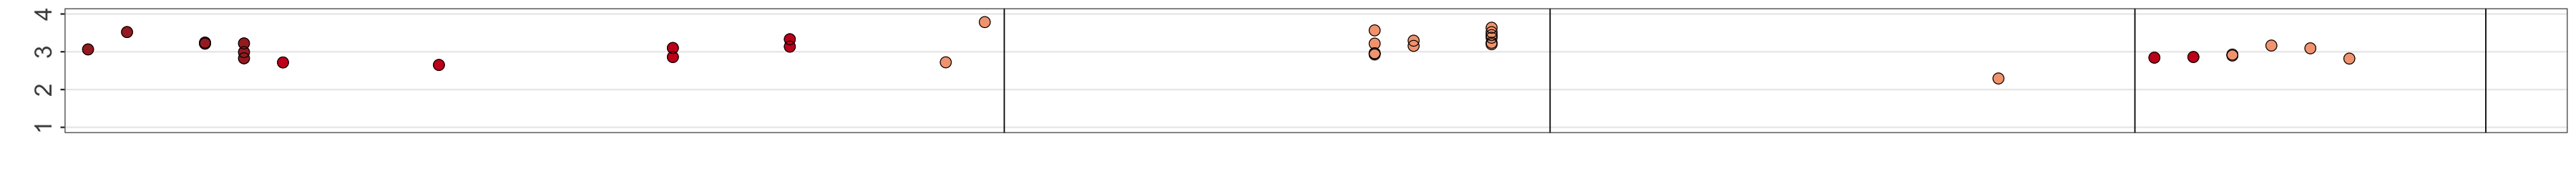

In [252]:
# SCGWAS

options(repr.plot.height = 2, repr.plot.width =30)
p_scgwas <- ggplot(scgwas_micro_graph, aes(x=factor(cell_type, levels=rev(ranked_cell_clusters)), 
                                           y=module_score_z, color=cut(Z_score, breaks = breaks_use))) +
geom_point(size=4) +  geom_point(shape = 1,size = 4,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(legend.position="None", 
     axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 15,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
scale_color_manual(values = color_values,
                   limits = limits_use) +
  ylim(1, 4) + labs(x="", y="") +
scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=24.5, color="black") + geom_vline(xintercept=38.5, color="black") + geom_vline(xintercept=53.5, color="black") + 
geom_vline(xintercept=62.5, color="black") + 
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(),legend.position="none", axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 

p_scgwas
# ggsave("./scGWAS_UC_TBE_Zscores_LIMITED.pdf", height=2, width=22.5)
# save_plot("./scGWAS_UC_Label_full_LIMITED.svg",  width=40, height=4,axis.textsize=0.5)

# ggsave("./scGWAS_UC_TBE_Zscores_LIMITED.pdf", height=2, width=22.5)
# save_plot("./scGWAS_UC_Label_full_LIMITED.svg",  width=40, height=4,axis.textsize=0.5)

[1] -14.04303

[1] 64.78217

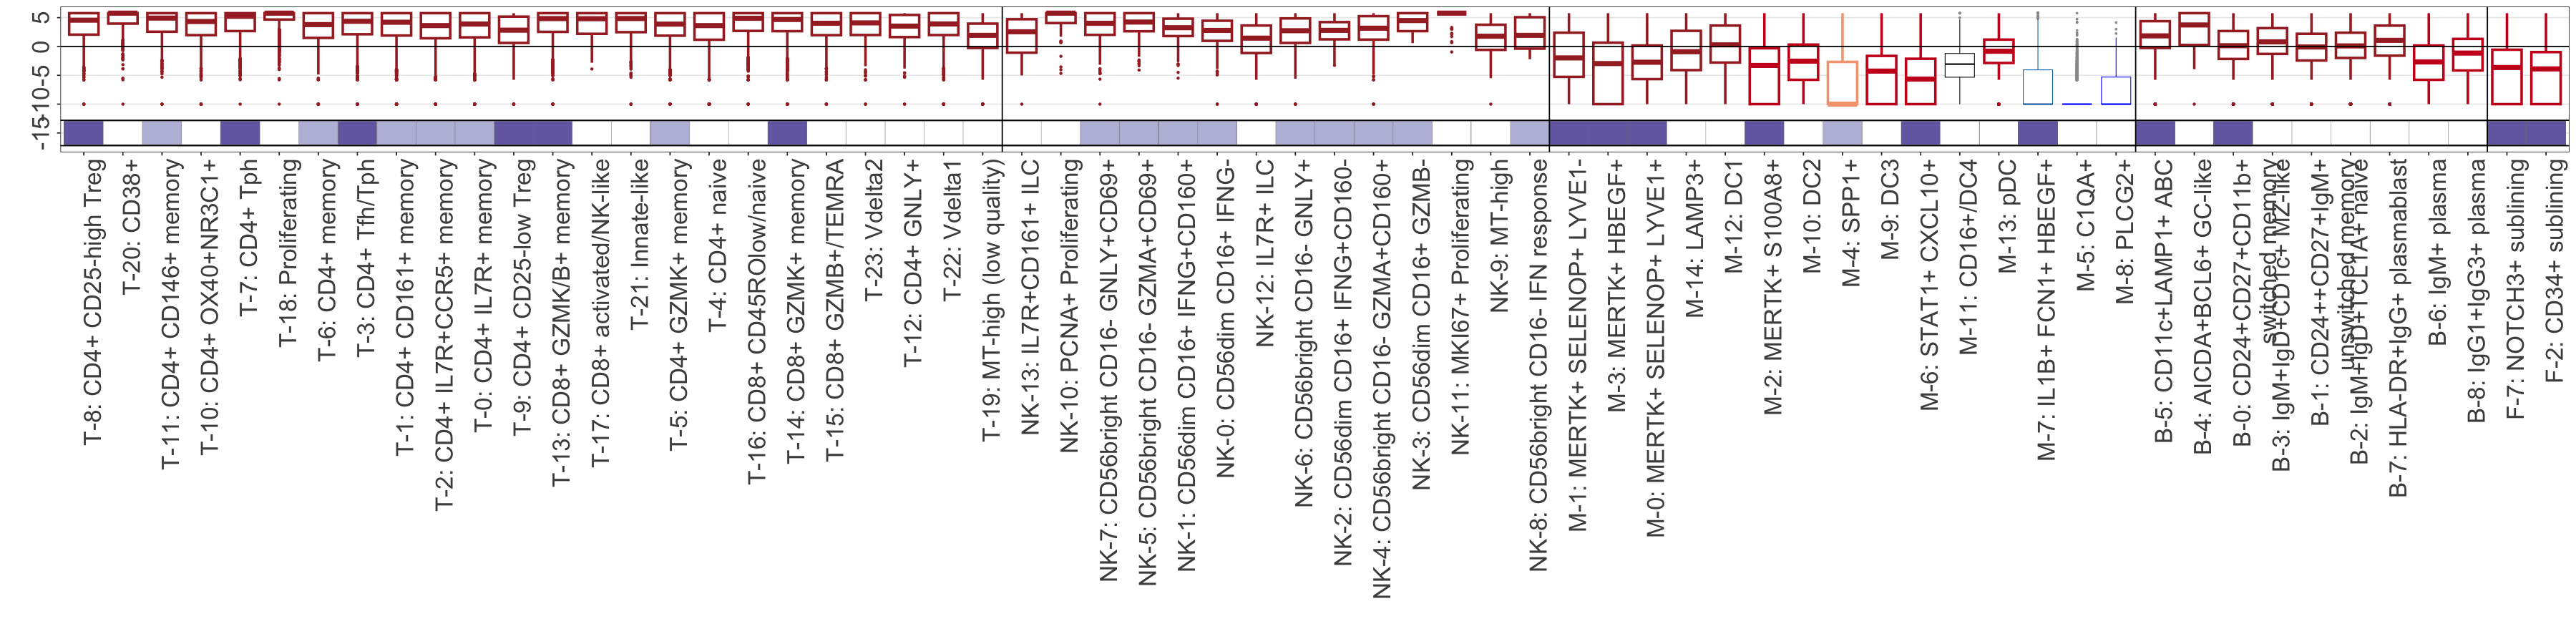

In [240]:
# SCDR SCP
min(meta_data$Z_score_micro_scp)
max(meta_data$Z_score_micro_scp)

data2 = meta_data[meta_data$cluster_name %in% scdrs_scp_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster_name %in% scdrs_scp_sig_cell_clusters,]
options(repr.plot.height = 2, repr.plot.width =22.5 ) #[meta_data$pval < 0.1,]
p_scp <- ggplot(meta_data, aes(x=factor(cluster_name, levels=rev(ranked_cell_clusters)), y=zscore_scp, color=cut(Z_score_micro_scp,, breaks = breaks_use))) +
geom_boxplot(data=data1, color="grey40", linewidth=0.3, outlier.colour = "grey60", outlier.size=0.4) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.6) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +

scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=24.5, color="black") + geom_vline(xintercept=38.5, color="black") + geom_vline(xintercept=53.5, color="black") + 
geom_vline(xintercept=62.5, color="black") + 
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(),legend.position="none", axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 

data2 = meta_data[meta_data$cluster_name %in% scdrs_scp_norib_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster_name %in% scdrs_scp_norib_sig_cell_clusters,]
options(repr.plot.height = 2, repr.plot.width =22.5 ) #[meta_data$pval < 0.1,]
p_scp_norib <- ggplot(meta_data, aes(x=factor(cluster_name, levels=rev(ranked_cell_clusters)), y=zscore_scp_norib, color=cut(Z_score_micro_scp_norib, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.4) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.6) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="black") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +

new_scale("fill") +

geom_tile(aes(x=factor(cluster_name, levels=rev(ranked_cell_clusters)), y=-15 , color="black", height=4, fill=factor(cluster_name, levels=rev(ranked_cell_clusters)))) +
scale_fill_manual(values=exp_colors_clean) + theme_bw(base_size=14) + 
geom_hline(yintercept=-12.8, color="black") + geom_hline(yintercept=-17.2, color="black") +
scale_x_discrete(limits=rev(ranked_cell_clusters)) + 


geom_vline(xintercept=24.5, color="black") + geom_vline(xintercept=38.5, color="black") + geom_vline(xintercept=53.5, color="black") + 
geom_vline(xintercept=62.5, color="black") + 
theme_bw() + 
theme( 
      axis.text.x = element_text(angle=90, size=20, hjust=1),legend.position="none", 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 

options(repr.plot.height=7.5, repr.plot.width=30)
p_scp_norib
# ggsave("./scDRS_UC_Label_full_LIMITED.pdf", height=5, width=22.5)
# save_plot("./scDRS_UC_Label_full_LIMITED.svg", fig = p1, width=22.5, height=5)

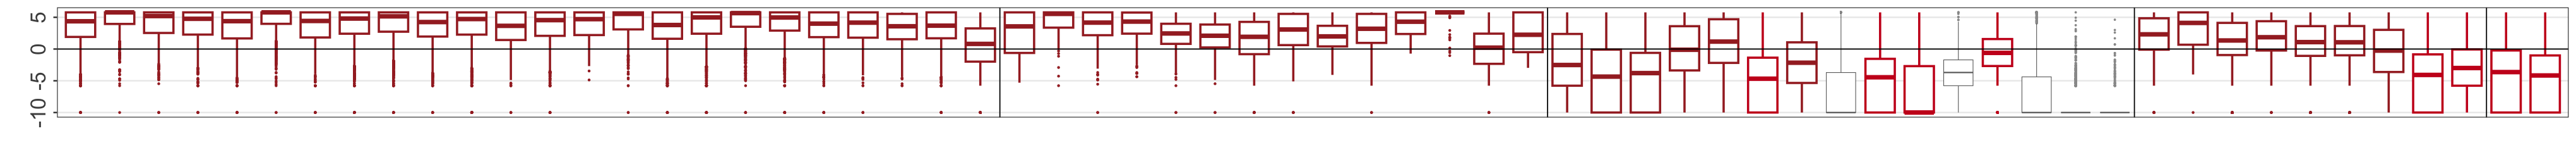

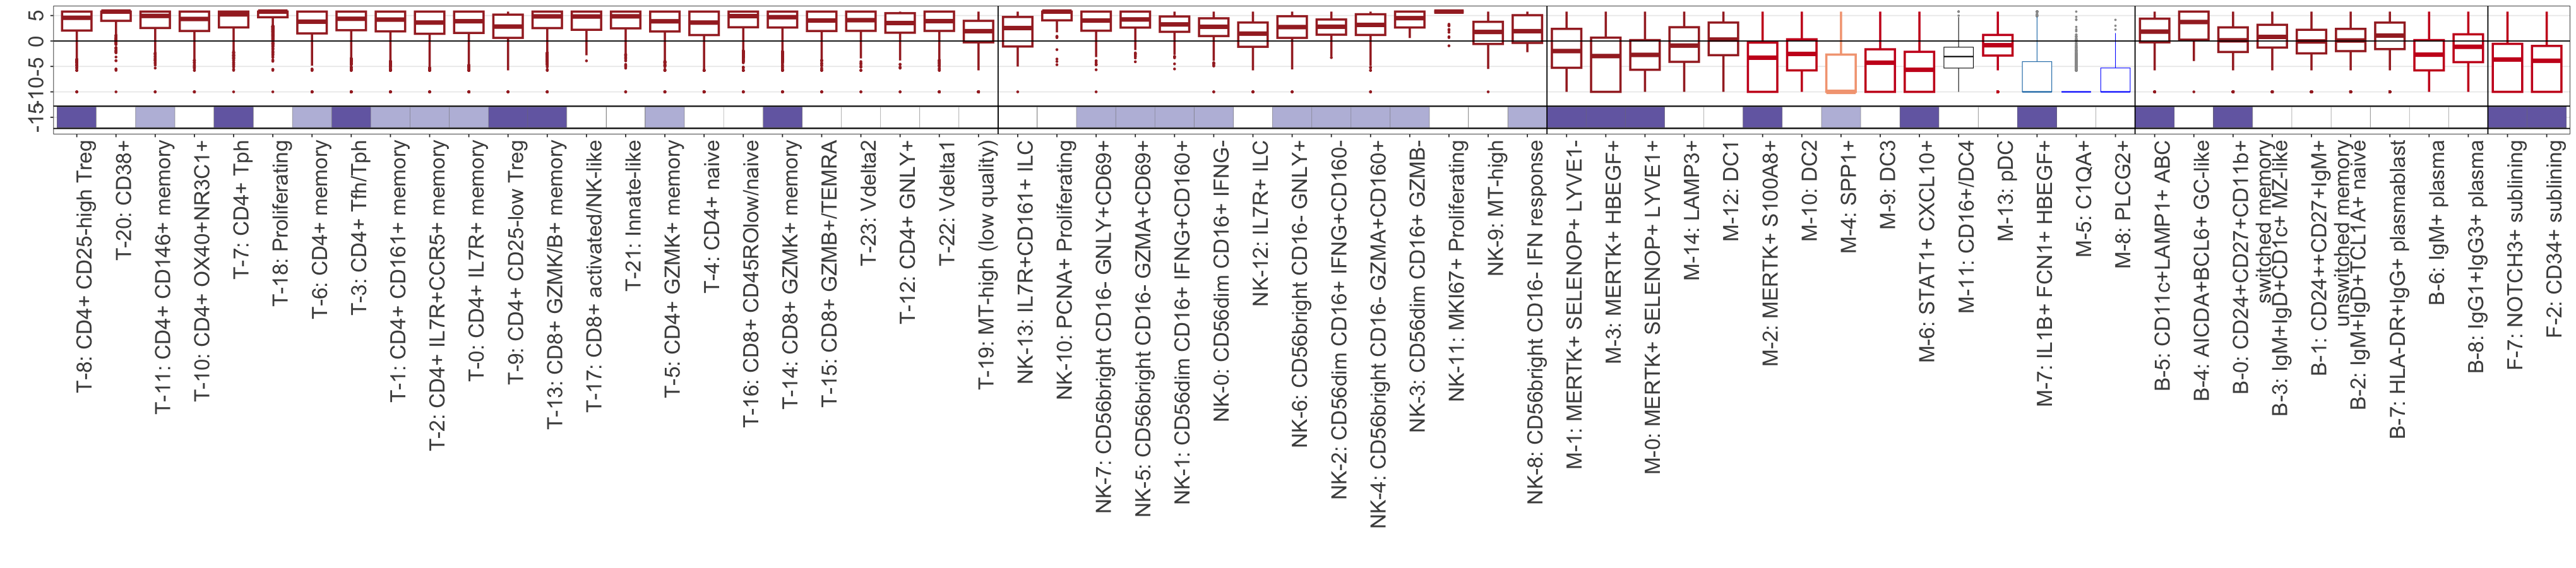

In [270]:
options(repr.plot.height=2, repr.plot.width=34)
p_scp
ggsave("./scDRS_scp_realRA_full_LIMITED.png", width=34, height=2, dpi=300)
options(repr.plot.height=7.5, repr.plot.width=34)
p_scp_norib# 46 sig calls
save_plot("./scDRS_scpnorib_realRA_full_LIMITED.svg", p_scp_norib, base_width=34, base_height=7.75)

In [164]:
min(meta_data$bt_score)


[1] -4.79681

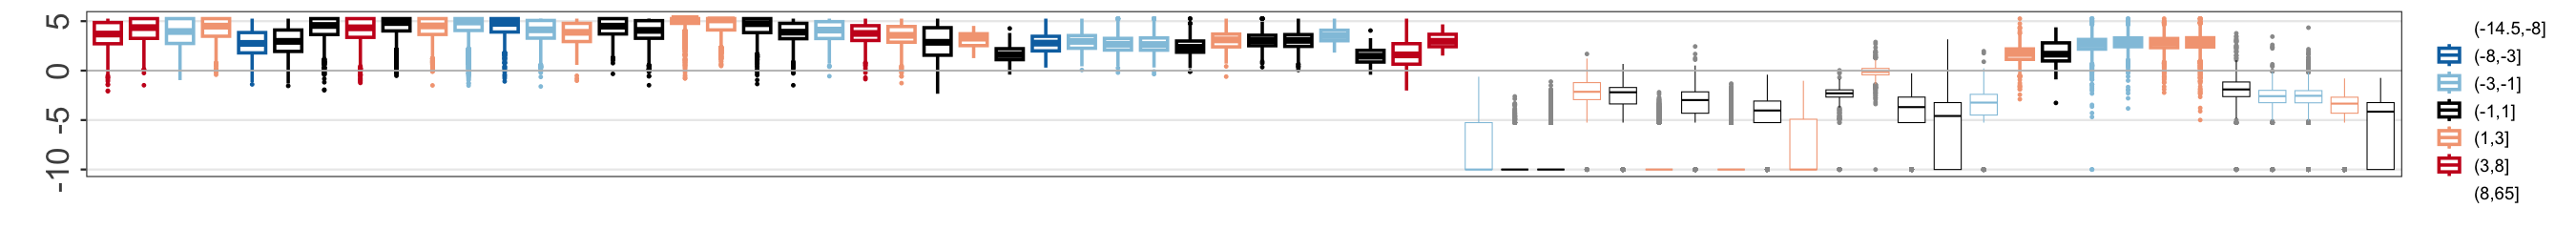

In [255]:
# SCPAGWAS


data2 = meta_data[meta_data$cluster_name %in% scpgwas_sig_cell_clusters,]
data1 = meta_data[!meta_data$cluster_name %in% scpgwas_sig_cell_clusters,]
options(repr.plot.height = 2, repr.plot.width =22.5 ) #[meta_data$pval < 0.1,]
p_scpagwas <- ggplot(meta_data, aes(x=factor(cluster_name, levels=rev(ranked_cell_clusters)), y=Random_Correct_BG_z, color=cut(bt_score, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.7) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.7) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="grey") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +


scale_x_discrete(limits=rev(ranked_cell_clusters)) + 

geom_vline(xintercept=24.5, color="black") + geom_vline(xintercept=38.5, color="black") + geom_vline(xintercept=53.5, color="black") + 
geom_vline(xintercept=62.5, color="black") + 
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(),legend.position="none", axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 


# plot to get legend
ggplot(meta_data, aes(x=factor(cluster_name, levels=rev(ranked_cell_clusters)), y=Random_Correct_BG_z, color=cut(bt_score, breaks = breaks_use))) +
geom_boxplot(data=data1, linewidth=0.3, outlier.colour = "grey60", outlier.size=0.7) +  
geom_boxplot(data=data2, linewidth=1, outlier.size=0.7) + 
#stat_summary(data=data1, fun.data=data_summary, color="grey80") + stat_summary(data=data2, fun.data=data_summary) + 
geom_hline(yintercept=0, color="grey") +
# scale_fill_manual(values = c('blue', 'cornflowerblue', 'grey', "#fc9272", '#de2d26'),
#                    limits = c('(-6.5,-3]', '(-3,-1]', '(-1,1]', '(1,3]', '(3,5]')) +
scale_color_manual(values = color_values,
                   limits = limits_use) +


scale_x_discrete(limits=rev(ranked_cell_clusters)) + 
theme_bw(base_size=14) + 
theme( 
      axis.text.x = element_blank(), axis.ticks.x=element_blank(),
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + #ylim(-6,5.3)  +
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  +
labs(y="",x='',fill="", color="") 


In [124]:
options(warn=-1)

In [214]:
#help(save_plot)

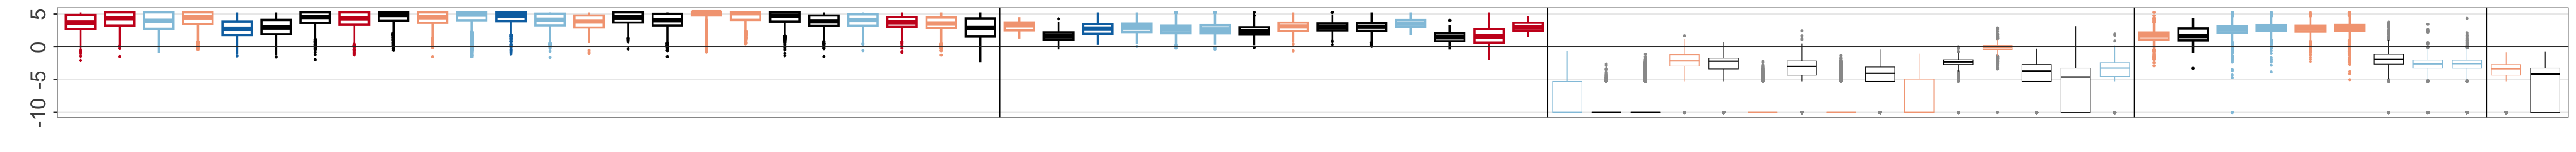

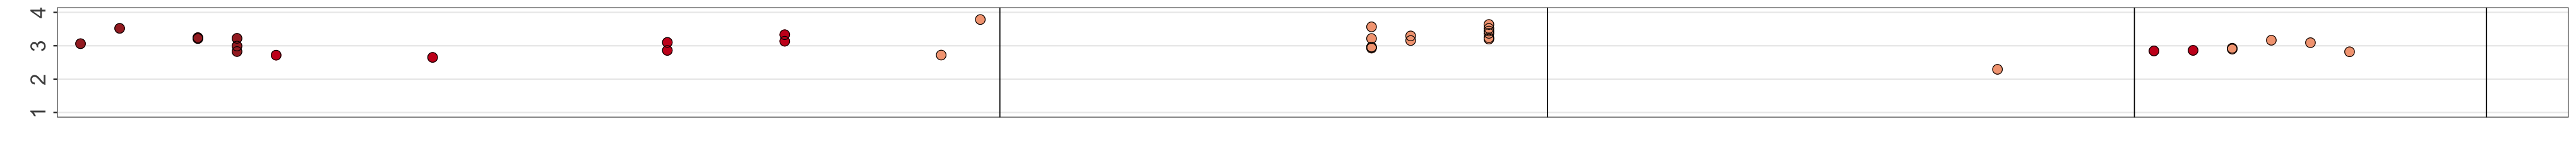

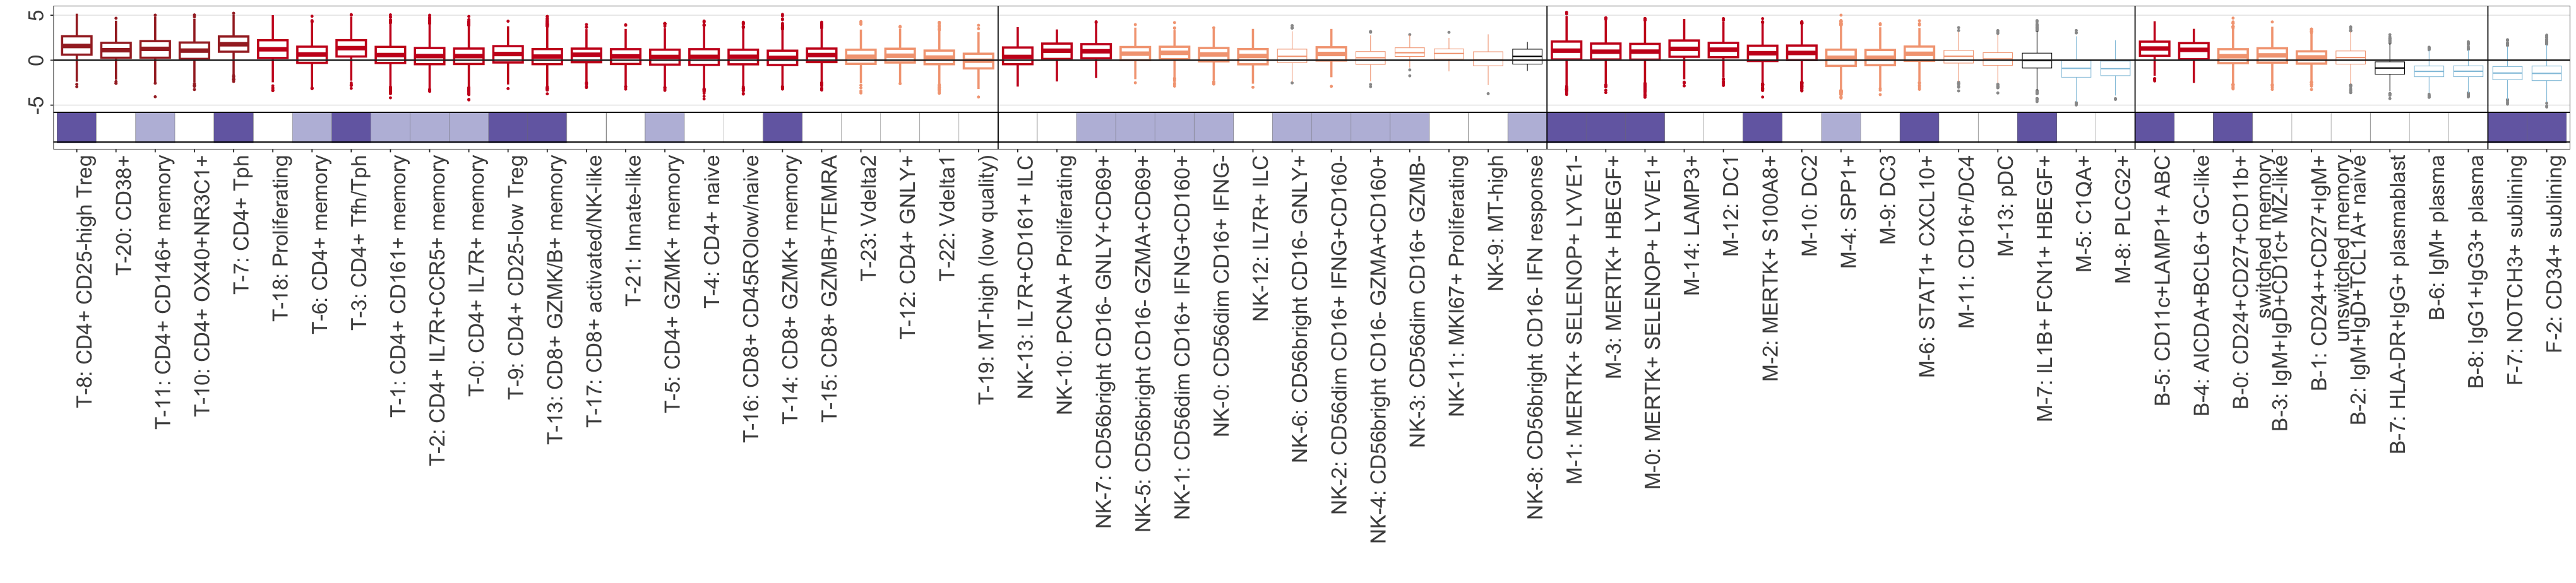

In [267]:
options(repr.plot.height=2, repr.plot.width=34)
p_scpagwas + geom_hline(yintercept=0, color="grey10")#43 sig calls
ggsave("./scPagwas_RA_full_LIMITED.png", dpi=300, width=34, height=2)
# save_plot("./scPagwas_RA_full_LIMITED.png", p_scpagwas, base_width=30, base_height=2)
# p_scp_norib
# save_plot("./scDRS_scpnorib_RA_full_LIMITED.svg", p_scp_norib, base_width=30, base_height=2)
# p_scp # 46 sig calls
# save_plot("./scDRS_scp_RA_full_LIMITED.svg", p_scp, base_width=30, base_height=2)
p_scgwas # 36 sig calls
ggsave("./scGWAS_RA_full_LIMITED.png", dpi=300, width=34, height=2)
# save_plot("./scGWAS_RA_full_LIMITED.svg", p_scgwas, base_width=30, base_height=2)
options(repr.plot.height=7.7)
p1 = p1 + geom_hline(yintercept=0, color="grey10")
p1
save_plot("./scDRS_RA_Label_full_LIMITED.svg", p1, base_width=34, base_height=7.7)

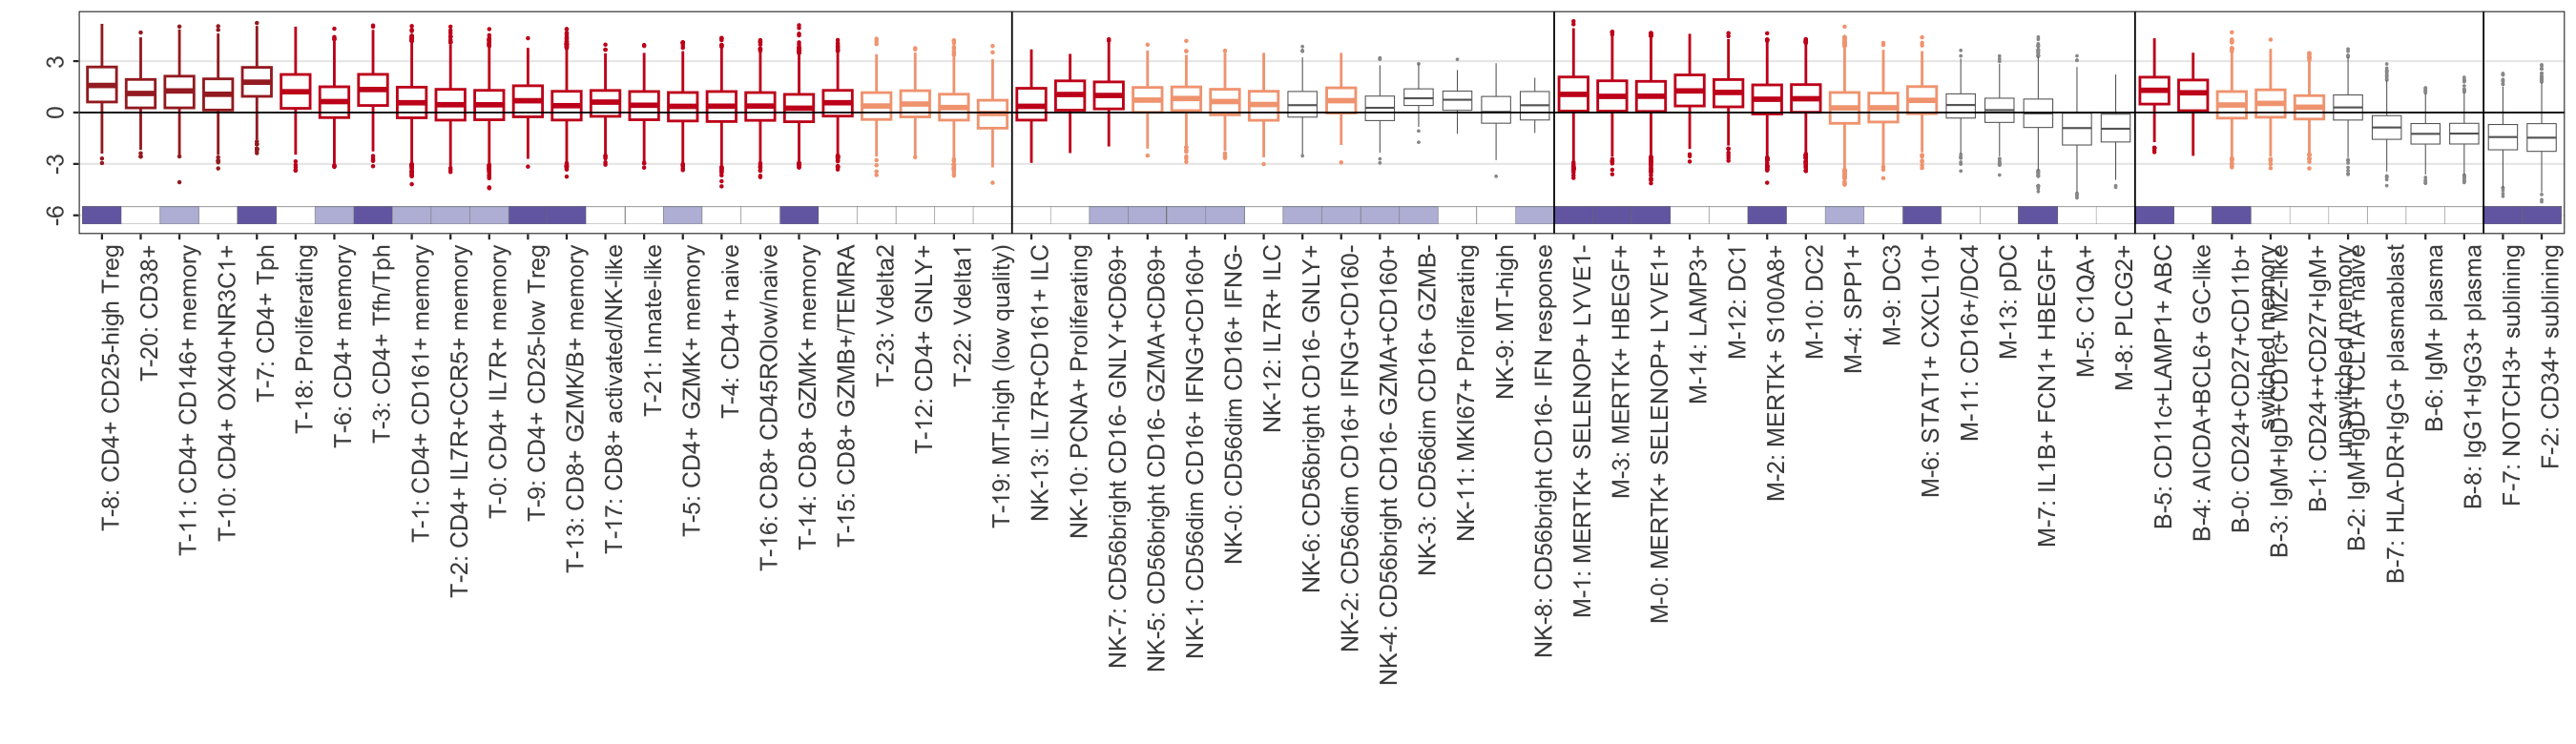

In [ ]:
# What do they do with the genes before that allows such a clear balance --> clearly not happenign this time